In [3]:
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import scipy
import warnings
import pylab
import os

from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
# Change Directory
# cd Documents\Universidad\EAFIT\Maestría en Ciencia de Datos y Analítica\Semestre 2\Teoría de Probabilidad\Proyecto de Curso
# current_dir = os.getcwd()
new_dir = 'd:/Copia de Seguridad/Documentos/Universidad/EAFIT/Maestría en Ciencia de Datos y Analítica/Semestre 2/Teoría de Probabilidad/Proyecto de Curso/ProbaPerros'
os.chdir(new_dir)
print(new_dir)

d:/Copia de Seguridad/Documentos/Universidad/EAFIT/Maestría en Ciencia de Datos y Analítica/Semestre 2/Teoría de Probabilidad/Proyecto de Curso/ProbaPerros


In [277]:
df = pd.read_excel('the_dataset.xlsx')

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30563 entries, 0 to 30562
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_birth   30563 non-null  datetime64[ns]
 1   death_date   30563 non-null  datetime64[ns]
 2   lifespan     30563 non-null  float64       
 3   sex          30563 non-null  object        
 4   neuter       30563 non-null  object        
 5   breed_vc     30474 non-null  object        
 6   pure_cross   30559 non-null  object        
 7   breed_group  30559 non-null  object        
 8   insured      30563 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 2.1+ MB


In [279]:
df.tail()

,date_birth,death_date,lifespan,sex,neuter,breed_vc,pure_cross,breed_group,insured
30558,2004-05-01 00:00:00,2017-06-25 23:00:00,13.152521,Male,Neutered,Crossbreed,Crossbred,Not_KC_Recognised,Insured
30559,2004-06-01 00:00:00,2017-08-13 23:00:00,13.201802,Male,Entire,Greyhound,Purebred,Hound,Insured
30560,2007-03-01 00:00:00,2016-10-23 23:00:00,9.650810,Male,Entire,Bulldog,Purebred,Utility,Insured
30561,2007-07-01 00:00:00,2018-08-23 23:00:00,11.148414,Male,Entire,Bulldog,Purebred,Utility,Uninsured
30562,2010-01-06 10:48:05,2016-02-08 00:00:00,6.087748,Female,Neutered,Bulldog,Purebred,Utility,Uninsured


In [1]:
def ajustar(lifespanvalueslist):
    dist_names = ['alpha','anglit','arcsine','argus','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','crystalball','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','gennorm','genpareto','genexpon','genextreme','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kappa4','kappa3','ksone','laplace','laplace_asymmetric','levy','levy_l','logistic','loggamma','loglaplace','lognorm','loguniform','lomax','maxwell','mielke','moyal','nakagami','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','rayleigh','rice','recipinvgauss','semicircular','skewcauchy','skewnorm','t','trapezoid','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max','wrapcauchy']

    warnings.filterwarnings("ignore")
    
    dist_accepted = []
    num_rejects = 0
    num_acceptances = 0
    alpha = 0.05
    maxpval = 0.05

    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(lifespanvalueslist)
        ks = scipy.stats.kstest(lifespanvalueslist, dist_name, args=param)

        D, pval = ks
        if pval < alpha or pd.isna(pval) == True:
            num_rejects += 1
        else:
            num_acceptances += 1
            dist_accepted.append(dist_name)
            print(pval,dist_name)
            if pval > maxpval:
                maxpval = pval
                maxdist_name = dist_name
            
    if maxpval == 0.05:
        print('No ajusta a ninguna distribución de scipy.stats')
    else:
        print('\n')
        print(maxpval,maxdist_name)
        print('\n')

# Todas las Razas Seleccionadas

## Ajuste de distribución Boxer

In [281]:
boxer = df.loc[df['breed_vc'] == 'Boxer']
boxer = boxer['lifespan'].tolist()

#boxer = df[df['breed_vc'].isin(['Boxer'])]['lifespan'].tolist()
#boxer

In [282]:
ecdf = ECDF(boxer)

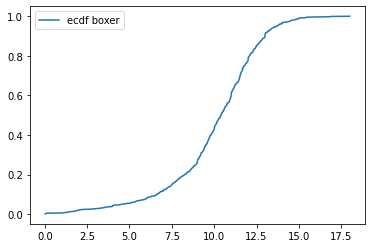

In [283]:
plt.plot(ecdf.x, ecdf.y, label="ecdf boxer")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [284]:
ajustar(boxer)

0.5457780255695374 burr
0.08235136621335937 dgamma
0.0564601432156574 dweibull
0.06363650395697729 fisk
0.6809367169970528 genlogistic
0.055886183075022244 hypsecant
0.6711096244402275 johnsonsu
0.06482967704862119 logistic
0.5456881988964049 mielke
0.07420243336903898 tukeylambda


0.6809367169970528 genlogistic


In [285]:
distboxer = st.genlogistic # Ajusta con fisk y logistic, pero pvalor bajo. Ajusta perfecto con burr. Pero aún mejor con genlogistic
args = distboxer.fit(boxer)
print(args)

(0.4016974266119234, 11.852910339513361, 0.9191475483653244)


### Test de Kolomogorov-Smirnov

In [286]:
st.kstest(boxer, distboxer.cdf, args)

KstestResult(statistic=0.024713250154173638, pvalue=0.6809367169970528)

H_0 = Datos observados provienen de una distribución exponencial con un parámetro de tasa de máxima verosimilitud
Si p_valor es bajo (menor a 0.05) entonces rechazo la nula.

In [287]:
[cboxer, lboxer, sboxer] = args

### Ajuste gráfico de funciones de distribución CDF

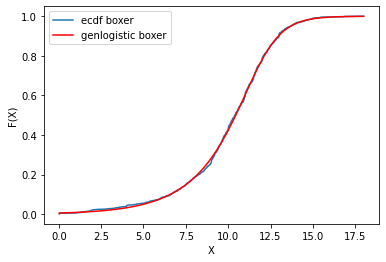

In [288]:
plt.plot(ecdf.x, ecdf.y, label="ecdf boxer")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(boxer), np.max(boxer))
plt.plot(x, distboxer.cdf(x, cboxer, lboxer, sboxer), label = "genlogistic boxer", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Distribución Labrador Retriever

In [289]:
labrador = df.loc[df['breed_vc'] == 'Labrador Retriever']
labrador = labrador['lifespan'].tolist()

In [290]:
ecdf = ECDF(labrador)

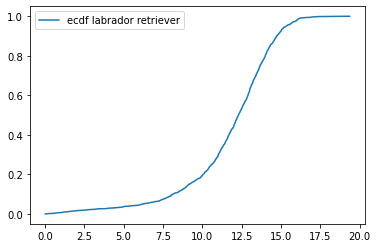

In [291]:
plt.plot(ecdf.x, ecdf.y, label="ecdf labrador retriever")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [292]:
ajustar(labrador)

0.5751552175694333 burr
0.5640222148253486 genlogistic
0.6548589536562177 johnsonsu
0.5431681857361934 mielke


0.6548589536562177 johnsonsu


In [293]:
distlabrador = st.johnsonsu # Ajusta perfecto con burr
args = distlabrador.fit(labrador)
print(args)

(1.5327678729294165, 1.6705793410739087, 15.126012695702531, 2.6607487019610203)


### Test de Kolomogorov-Smirnov

H_0 = Datos observados provienen de una distribución exponencial con un parámetro de tasa de máxima verosimilitud.
Si p_valor es bajo (menor a 0.05) entonces rechazo la nula.

In [294]:
st.kstest(labrador, distlabrador.cdf, args)

KstestResult(statistic=0.014660986629145278, pvalue=0.6548589536562177)

In [295]:
[clabrador, dlabrador, llabrador, slabrador] = args

### Ajuste gráfico de funciones de distribución CDF

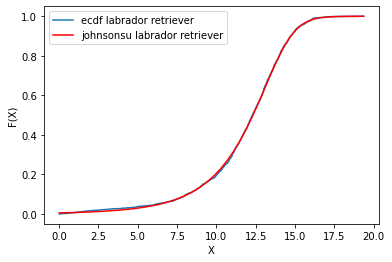

In [296]:
plt.plot(ecdf.x, ecdf.y, label="ecdf labrador retriever")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(labrador), np.max(labrador))
plt.plot(x, distlabrador.cdf(x, clabrador, dlabrador, llabrador, slabrador), label = "johnsonsu labrador retriever", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Pastor Alemán

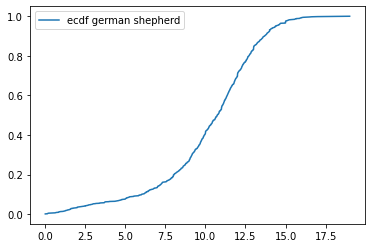

In [297]:
german = df.loc[df['breed_vc'] == 'German Shepherd Dog']
german = german['lifespan'].tolist()

ecdf = ECDF(german)

plt.plot(ecdf.x, ecdf.y, label="ecdf german shepherd")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [298]:
ajustar(german)

0.5112576783367154 burr
0.09102429055260175 burr12
0.6485155859856944 genlogistic
0.10846933609234943 gengamma
0.13408611054961805 gumbel_l
0.7775398778888035 johnsonsu
0.126438324907013 loggamma
0.5112563388322298 mielke
0.09683338859905433 powernorm


0.7775398778888035 johnsonsu


In [299]:
distgerman = st.johnsonsu # Ajusta perfecto con burr
args = distgerman.fit(german)
print(args)
st.kstest(german, distgerman.cdf, args)

(1.481190038901691, 1.8710212053489057, 14.0655935250031, 3.8409798488837934)


KstestResult(statistic=0.019755046203017143, pvalue=0.7775398778888035)

### Ajuste gráfico de funciones de distribución CDF

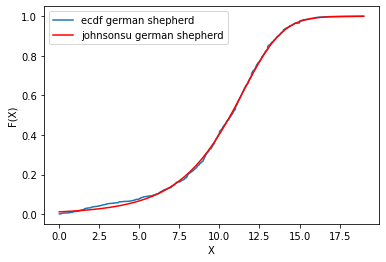

In [300]:
[cgerman, dgerman, lgerman, sgerman] = args #dgerman,

plt.plot(ecdf.x, ecdf.y, label="ecdf german shepherd")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(german), np.max(german))
plt.plot(x, distgerman.cdf(x, cgerman, dgerman, lgerman, sgerman), label = "johnsonsu german shepherd", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Staffordshire Bull Terrier 

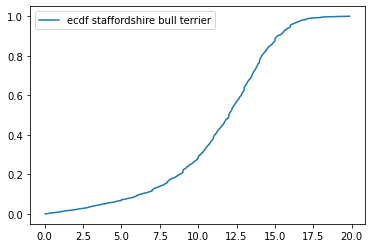

In [301]:
staffordshire  = df.loc[df['breed_vc'] == 'Staffordshire Bull Terrier']
staffordshire = staffordshire['lifespan'].tolist()

ecdf = ECDF(staffordshire)

plt.plot(ecdf.x, ecdf.y, label="ecdf staffordshire bull terrier")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [302]:
ajustar(staffordshire)

0.1849615121506044 burr
0.09225663577622589 burr12
0.28377186390966336 genlogistic
0.22838683726779518 gumbel_l
0.2951458553890767 johnsonsu
0.08936126512533005 loggamma
0.18497164541901912 mielke
0.06015003899965832 weibull_min


0.2951458553890767 johnsonsu


In [303]:
diststaffordshire = st.johnsonsu # Ajusta perfecto con genlogistic
args = diststaffordshire.fit(staffordshire)
print(args)
st.kstest(staffordshire, diststaffordshire.cdf, args)

(2.2367775443633104, 2.1538693472476584, 17.227150464437372, 4.288036514741686)


KstestResult(statistic=0.0201019731648458, pvalue=0.2951458553890767)

### Ajuste gráfico de funciones de distribución CDF

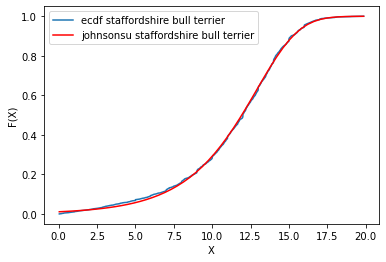

In [304]:
[cstaffordshire, dstaffordshire,  lstaffordshire, sstaffordshire] = args #dstaffordshire,

plt.plot(ecdf.x, ecdf.y, label="ecdf staffordshire bull terrier")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(staffordshire), np.max(staffordshire))
plt.plot(x, diststaffordshire.cdf(x, cstaffordshire, dstaffordshire, lstaffordshire, sstaffordshire), label = "johnsonsu staffordshire bull terrier", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Jack Russell Terrier

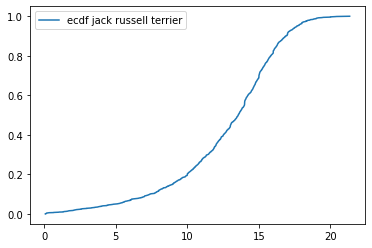

In [305]:
jack  = df.loc[df['breed_vc'] == 'Jack Russell Terrier']
jack = jack['lifespan'].tolist()

ecdf = ECDF(jack)

plt.plot(ecdf.x, ecdf.y, label="ecdf jack russell terrier")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [306]:
ajustar(jack)

0.7635770049649195 burr
0.4319943808541441 burr12
0.15732372331054023 exponweib
0.4824329179101424 genlogistic
0.15725629232178573 gengamma
0.05385217421134436 gompertz
0.16830238621037452 gumbel_l
0.08337364793543711 johnsonsb
0.28107824446815466 johnsonsu
0.06309169442169338 laplace_asymmetric
0.18804338835198753 loggamma
0.7635644166199633 mielke
0.13761249683754084 weibull_min


0.7635770049649195 burr


In [307]:
distjack = st.burr # Ajusta perfecto con burr
args = distjack.fit(jack)
print(args)
st.kstest(jack, distjack.cdf, args)

(30.387953029513955, 0.17470206440307529, -9.552993972266169, 26.19665892595384)


KstestResult(statistic=0.01652633733959541, pvalue=0.7635770049649195)

### Ajuste gráfico de funciones de distribución CDF

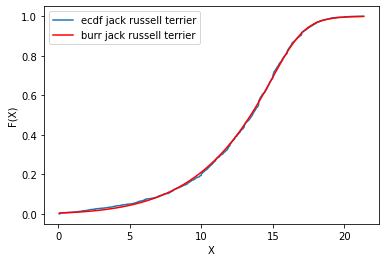

In [308]:
[cjack, djack, ljack, sjack] = args

plt.plot(ecdf.x, ecdf.y, label="ecdf jack russell terrier")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(jack), np.max(jack))
plt.plot(x, distjack.cdf(x, cjack, djack, ljack, sjack), label = "burr jack russell terrier", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de West Highland White Terrier

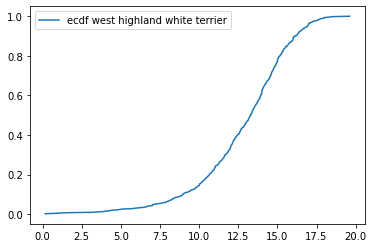

In [309]:
west  = df.loc[df['breed_vc'] == 'West Highland White Terrier']
west = west['lifespan'].tolist()

ecdf = ECDF(west)

plt.plot(ecdf.x, ecdf.y, label="ecdf west highland white terrier")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [310]:
ajustar(west)

0.47213060399607365 burr
0.81731551586435 burr12
0.22016747629603994 genlogistic
0.8691825616336974 gengamma
0.6224842494910289 gompertz
0.5966496538717562 gumbel_l
0.6984911278960602 johnsonsb
0.9461359861481146 johnsonsu
0.873344104141528 loggamma
0.47219157779537346 mielke
0.6489820653851497 pearson3
0.306644070996857 powerlognorm
0.8889392716581539 powernorm
0.3844012261612314 skewnorm


0.9461359861481146 johnsonsu


In [311]:
distwest = st.johnsonsu # Ajusta perfecto con burr
args = distwest.fit(west)
print(args)
st.kstest(west, distwest.cdf, args)

(2.9334029735213445, 2.59999238996668, 18.922218077903963, 4.109522647773293)


KstestResult(statistic=0.015636052418585344, pvalue=0.9461359861481146)

### Ajuste gráfico de funciones de distribución CDF

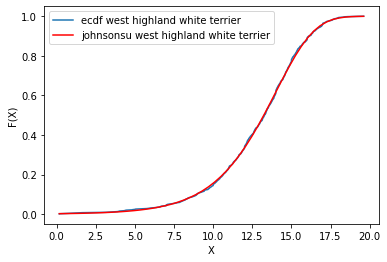

In [312]:
[cwest, dwest, lwest, swest] = args

plt.plot(ecdf.x, ecdf.y, label="ecdf west highland white terrier")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(west), np.max(west))
plt.plot(x, distwest.cdf(x, cwest, dwest, lwest, swest), label = "johnsonsu west highland white terrier", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Cocker Spaniel

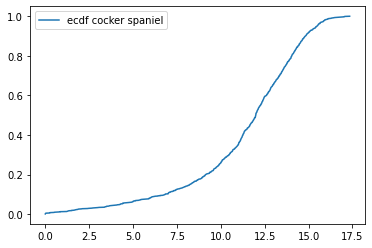

In [313]:
cocker  = df.loc[df['breed_vc'] == 'Cocker Spaniel']
cocker = cocker['lifespan'].tolist()

ecdf = ECDF(cocker)

plt.plot(ecdf.x, ecdf.y, label="ecdf cocker spaniel")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [314]:
ajustar(cocker)

0.14893928621314723 burr
0.35520500370712826 exponweib
0.09535445976651524 genlogistic
0.20363714567140878 gumbel_l
0.2617433103228375 johnsonsb
0.5144873504290757 johnsonsu
0.5586135712485509 loggamma
0.14893992221928765 mielke


0.5586135712485509 loggamma


In [315]:
distcocker = st.loggamma # Ajusta perfecto con loggamma
args = distcocker.fit(cocker)
print(args)
st.kstest(cocker, distcocker.cdf, args)

(0.6242845889552204, 13.974974873755272, 1.814773095511687)


KstestResult(statistic=0.024110599949192624, pvalue=0.5586135712485509)

### Ajuste gráfico de funciones de distribución CDF

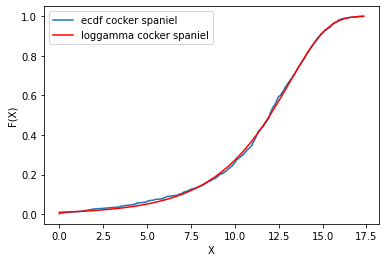

In [316]:
[ccocker, lcocker, scocker] = args

plt.plot(ecdf.x, ecdf.y, label="ecdf cocker spaniel")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(cocker), np.max(cocker))
plt.plot(x, distcocker.cdf(x, ccocker, lcocker, scocker), label = "loggamma cocker spaniel", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Yorkshire Terrier

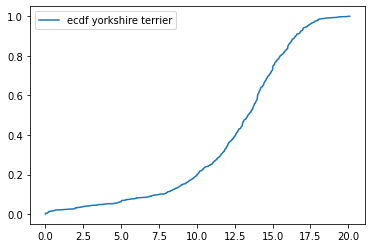

In [317]:
yorkshire  = df.loc[df['breed_vc'] == 'Yorkshire Terrier']
yorkshire = yorkshire['lifespan'].tolist()

ecdf = ECDF(yorkshire)

plt.plot(ecdf.x, ecdf.y, label="ecdf yorkshire terrier")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [318]:
ajustar(yorkshire)

0.5785017204895558 burr
0.05445711254739671 burr12
0.5874524178241427 genlogistic
0.1984901856422544 gumbel_l
0.13227865580787146 johnsonsb
0.7507336677266359 johnsonsu
0.09127735336802156 laplace_asymmetric
0.3396123142132118 loggamma
0.5796861102129416 mielke


0.7507336677266359 johnsonsu


In [319]:
distyorkshire = st.johnsonsu # Ajusta perfecto con genlogistic
args = distyorkshire.fit(yorkshire)
print(args)
st.kstest(yorkshire, distyorkshire.cdf, args)

(1.890896684194473, 1.7408520044109013, 17.72263184345857, 3.353324525126842)


KstestResult(statistic=0.020814040513171456, pvalue=0.7507336677266359)

### Ajuste gráfico de funciones de distribución CDF

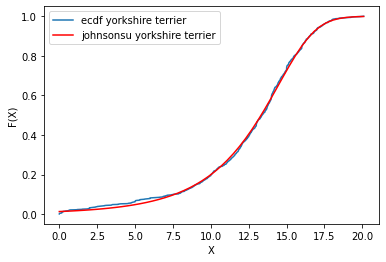

In [320]:
[cyorkshire, dyorkshire, lyorkshire, syorkshire] = args

plt.plot(ecdf.x, ecdf.y, label="ecdf yorkshire terrier")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(yorkshire), np.max(yorkshire))
plt.plot(x, distyorkshire.cdf(x, cyorkshire, dyorkshire, lyorkshire, syorkshire), label = "johnsonsu yorkshire terrier", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Border Collie

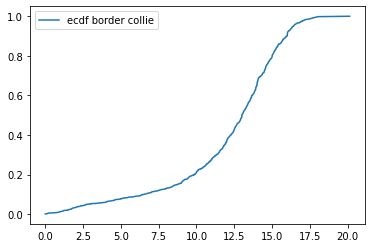

In [321]:
border  = df.loc[df['breed_vc'] == 'Border Collie']
border = border['lifespan'].tolist()

ecdf = ECDF(border)

plt.plot(ecdf.x, ecdf.y, label="ecdf border collie")
plt.legend()

In [322]:
ajustar(border)

0.38162877281148333 burr
0.06150475726600391 burr12
0.37935353399147675 genlogistic
0.5295733451716913 johnsonsu
0.1081454278438233 loggamma
0.3816928051500045 mielke


0.5295733451716913 johnsonsu


### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [323]:
distborder = st.johnsonsu # Ajusta perfecto con burr
args = distborder.fit(border)
print(args)
st.kstest(border, distborder.cdf, args)

(1.8468463741038907, 1.5292684810556691, 16.793122460106332, 2.5008711642030246)


KstestResult(statistic=0.026239170869235662, pvalue=0.5295733451716913)

### Ajuste gráfico de funciones de distribución CDF

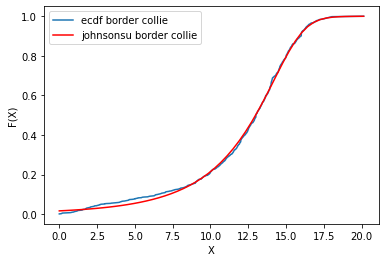

In [324]:
[cborder, dborder, lborder, sborder] = args

plt.plot(ecdf.x, ecdf.y, label="ecdf border collie")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(border), np.max(border))
plt.plot(x, distborder.cdf(x, cborder, dborder, lborder, sborder), label = "johnsonsu border collie", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Cavalier King Charles Spaniel

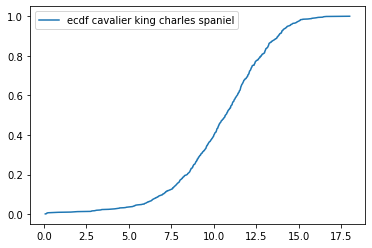

In [360]:
cavalier  = df.loc[df['breed_vc'] == 'Cavalier King Charles Spaniel']
cavalier = cavalier['lifespan'].tolist()

ecdf = ECDF(cavalier)

plt.plot(ecdf.x, ecdf.y, label="ecdf cavalier king charles spaniel")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [326]:
ajustar(cavalier)

0.8453119847494985 beta
0.4692728394973166 burr
0.7324659447585204 burr12
0.050959387976646564 chi
0.3239379907608537 dgamma
0.36818143282903226 dweibull
0.09092522241973733 exponnorm
0.6109461771360837 exponweib
0.0810953702295596 f
0.07578361093764818 fatiguelife
0.30753145412656824 fisk
0.09072816199476696 foldnorm
0.5551586518232487 genlogistic
0.25944218184637524 gennorm
0.1482201008118118 gompertz
0.1150031328413339 gumbel_l
0.16197827292639233 hypsecant
0.8931565483549048 johnsonsb
0.9560962359759758 johnsonsu
0.30660559646214536 logistic
0.9464555719819001 loggamma
0.0662378091678365 lognorm
0.46926986090893774 mielke
0.0775218375524428 nakagami
0.0907463144095092 norm
0.8678668224513693 pearson3
0.9879152502202677 powerlognorm
0.919733127929403 powernorm
0.09269981003454342 rdist
0.09055822793094737 rice
0.728462754781804 skewnorm
0.09140738153057193 t
0.3201499732788028 tukeylambda
0.36694679487426995 vonmises_line


0.9879152502202677 powerlognorm


In [358]:
distcavalier = st.powerlognorm # Ajusta perfecto con loggamma
args = distcavalier.fit(cavalier)
print(args)
st.kstest(cavalier, distcavalier.cdf, args)

(10.313250812807182, 0.004384869202543003, -1038.458933759542, 1056.1074360640614)


KstestResult(statistic=0.015092470278006198, pvalue=0.9879152502202677)

### Ajuste gráfico de funciones de distribución CDF

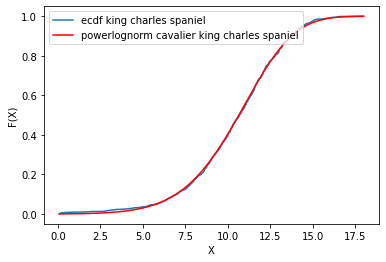

In [361]:
[ccavalier, dcavalier, lcavalier, scavalier] = args

plt.plot(ecdf.x, ecdf.y, label="ecdf king charles spaniel")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(cavalier), np.max(cavalier))
plt.plot(x, distcavalier.cdf(x, ccavalier, dcavalier, lcavalier, scavalier), label = "powerlognorm cavalier king charles spaniel", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Springer Spaniel

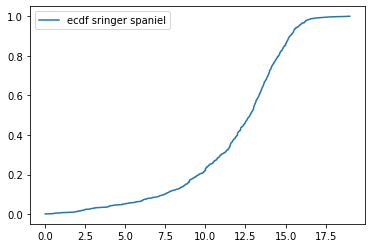

In [329]:
springer  = df.loc[df['breed_vc'] == 'Springer Spaniel']
springer = springer['lifespan'].tolist()

ecdf = ECDF(springer)

plt.plot(ecdf.x, ecdf.y, label="ecdf sringer spaniel")
plt.legend()

In [330]:
ajustar(springer)

0.7008273068209692 burr
0.20601757813793087 exponweib
0.962808508869422 genlogistic
0.057674457756620945 gumbel_l
0.07762328968364018 johnsonsb
0.7718408416209599 johnsonsu
0.3372656680668803 laplace_asymmetric
0.24152175880032367 loggamma
0.7008539560501565 mielke
0.05907508370036396 weibull_min


0.962808508869422 genlogistic


### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [331]:
distspringer = st.genlogistic # Ajusta perfecto con genlogistic
args = distspringer.fit(springer)
print(args)
st.kstest(springer, distspringer.cdf, args)

(0.2110380255559118, 14.962011566677923, 0.6835730052394111)


KstestResult(statistic=0.01770220030233971, pvalue=0.962808508869422)

### Ajuste gráfico de funciones de distribución CDF

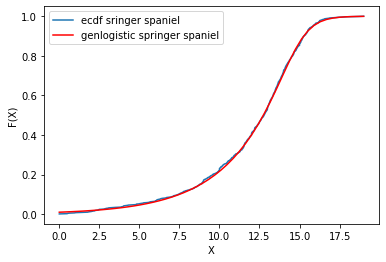

In [332]:
[cspringer, lspringer, sspringer] = args

plt.plot(ecdf.x, ecdf.y, label="ecdf sringer spaniel")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(springer), np.max(springer))
plt.plot(x, distspringer.cdf(x, cspringer, lspringer, sspringer), label = "genlogistic springer spaniel", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Comparación de todas las razas

In [333]:
print(cstaffordshire, dstaffordshire, lstaffordshire, sstaffordshire)
print(cgerman, dgerman, lgerman, sgerman)

2.2367775443633104 2.1538693472476584 17.227150464437372 4.288036514741686
1.481190038901691 1.8710212053489057 14.0655935250031 3.8409798488837934


In [334]:
print(ccavalier, lcavalier, scavalier)
print(ccocker, lcocker, scocker)

10.313250812807182 -1038.458933759542 1056.1074360640614
0.6242845889552204 13.974974873755272 1.814773095511687


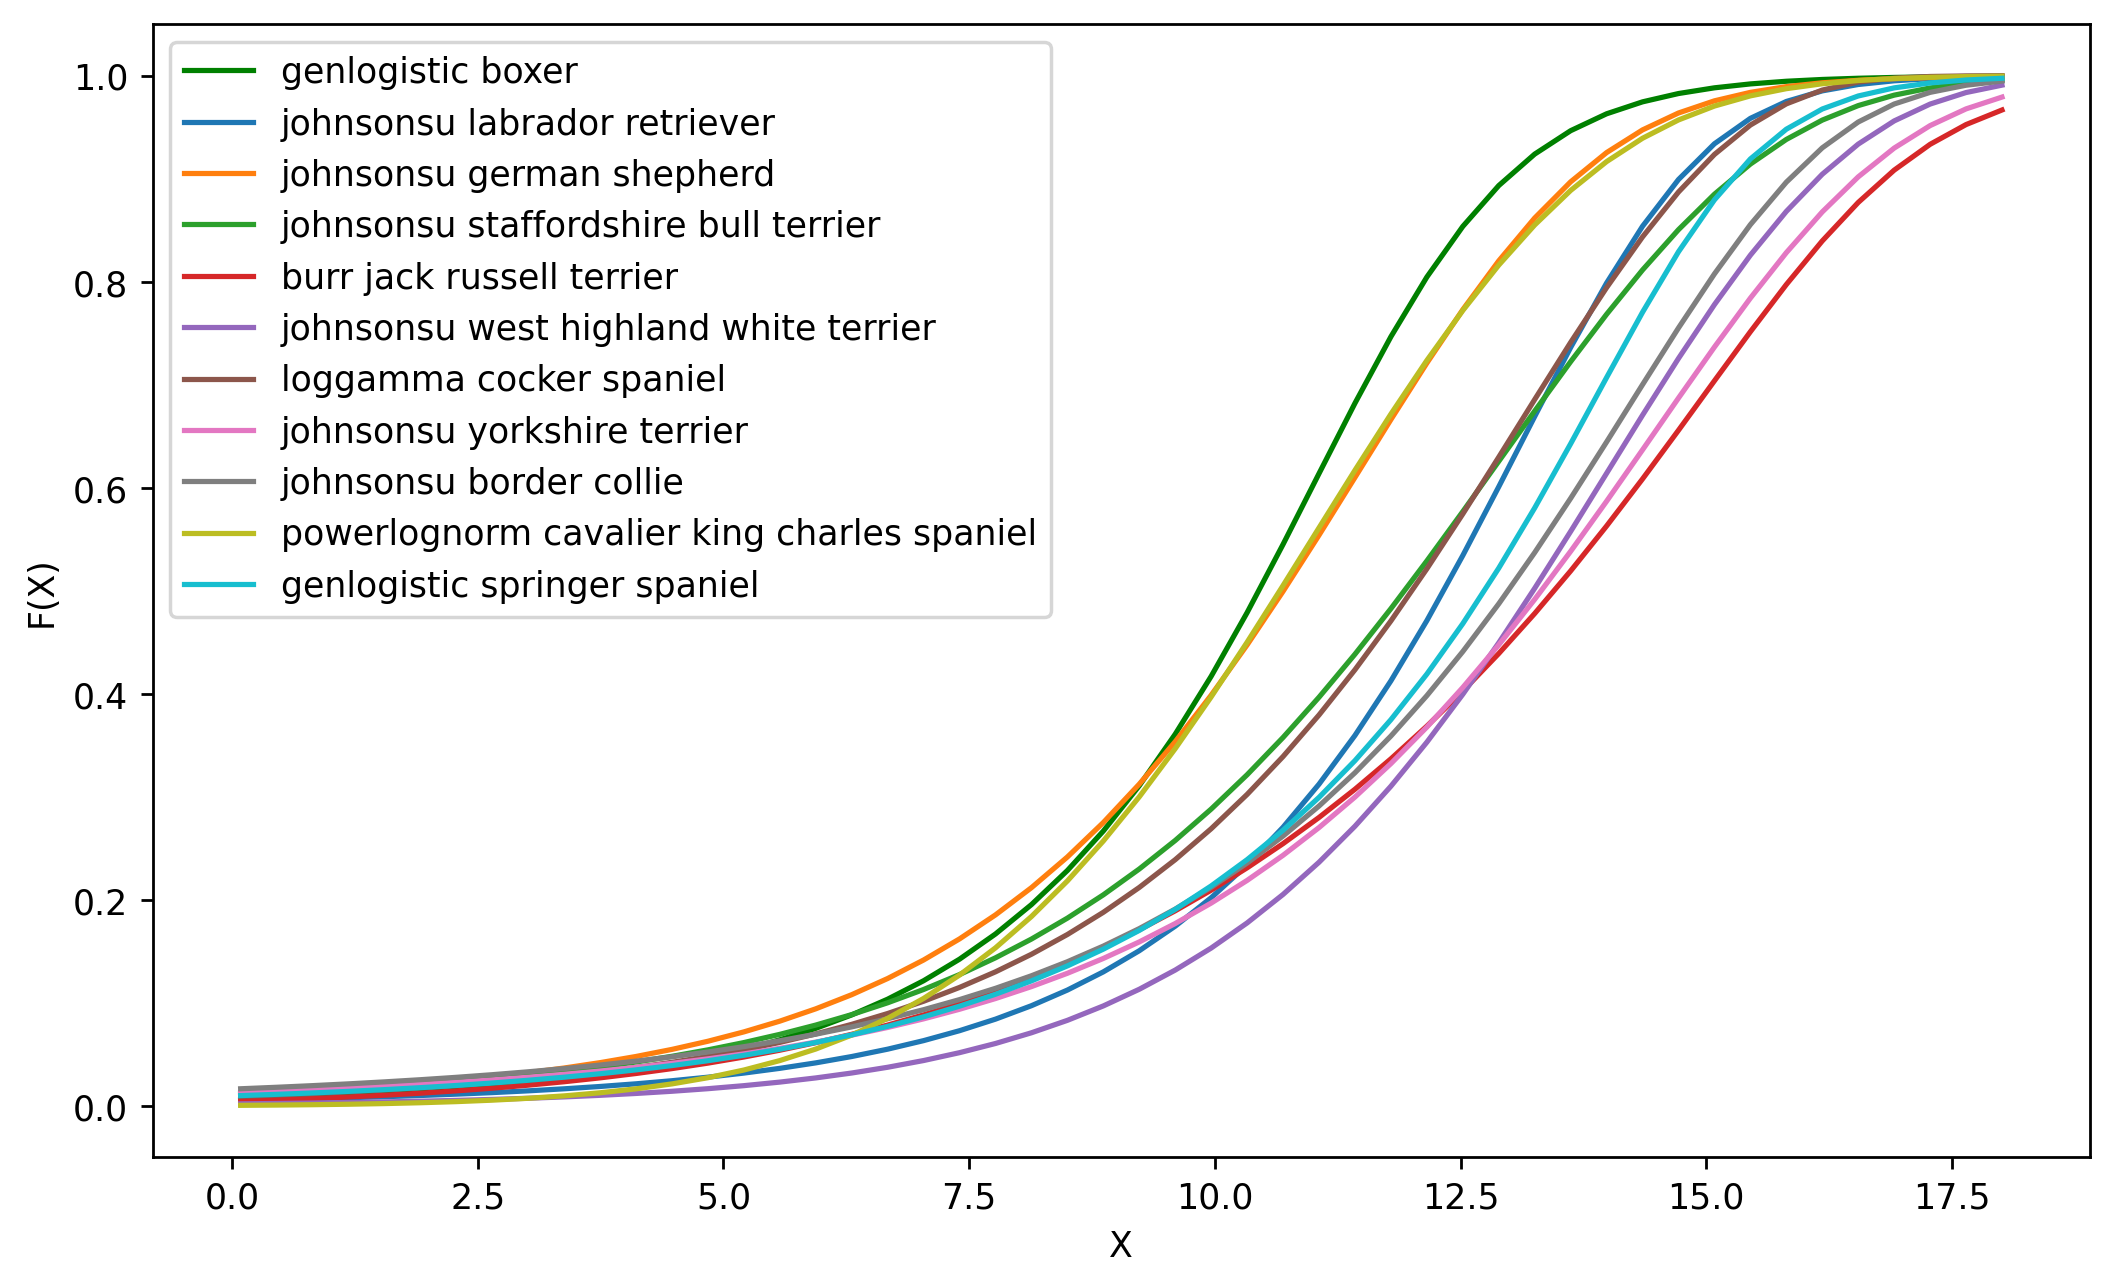

In [363]:
x = np.linspace(np.min(cavalier), np.max(cavalier))
plt.figure(figsize=(10,6), dpi=250)

plt.plot(x, distboxer.cdf(x, cboxer, lboxer, sboxer), label = "genlogistic boxer", color='green')
plt.plot(x, distlabrador.cdf(x, clabrador, dlabrador, llabrador, slabrador), label = "johnsonsu labrador retriever")
plt.plot(x, distgerman.cdf(x, cgerman, dgerman, lgerman, sgerman), label = "johnsonsu german shepherd") # IGUAL A STAFFORDSHIRE BULLTERRIER
plt.plot(x, diststaffordshire.cdf(x, cstaffordshire, dstaffordshire, lstaffordshire, sstaffordshire), label = "johnsonsu staffordshire bull terrier") # IGUAL A GERMAN SHEPERD
plt.plot(x, distjack.cdf(x, cjack, djack, ljack, sjack), label = "burr jack russell terrier")
plt.plot(x, distwest.cdf(x, cwest, dwest, lwest, swest), label = "johnsonsu west highland white terrier")
plt.plot(x, distcocker.cdf(x, ccocker, lcocker, scocker), label = "loggamma cocker spaniel") # IGUAL A CAVALIER
plt.plot(x, distyorkshire.cdf(x, cyorkshire, dyorkshire, lyorkshire, syorkshire), label = "johnsonsu yorkshire terrier")
plt.plot(x, distborder.cdf(x, cborder, dborder, lborder, sborder), label = "johnsonsu border collie")
plt.plot(x, distcavalier.cdf(x, ccavalier, dcavalier, lcavalier, scavalier), label = "powerlognorm cavalier king charles spaniel") # IGUAL A COCKER
plt.plot(x, distspringer.cdf(x, cspringer, lspringer, sspringer), label = "genlogistic springer spaniel")
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

# Análisis de Tamaño

## Ajuste de Razas Pequeñas

In [336]:
small = []

jack_russell_terrier = df.loc[df['breed_vc'] == 'Jack Russell Terrier']
jack_russell_terrier = jack_russell_terrier['lifespan'].tolist()
small.extend(jack_russell_terrier)

west_highland_white_terrier = df.loc[df['breed_vc'] == 'West Highalnd White Terrier']
west_highland_white_terrier = west_highland_white_terrier['lifespan'].tolist()
small.extend(west_highland_white_terrier)

yorkshire_terrier = df.loc[df['breed_vc'] == 'Yorkshire Terrier']
yorkshire_terrier = yorkshire_terrier['lifespan'].tolist()
small.extend(yorkshire_terrier)

cavalier_king_charles_spaniel = df.loc[df['breed_vc'] == 'Cavalier King Charles Spaniel']
cavalier_king_charles_spaniel = cavalier_king_charles_spaniel['lifespan'].tolist()
small.extend(cavalier_king_charles_spaniel)

# small = df[df['breed_vc'].isin(['Jack Russell Terrier','West Highalnd White Terrier','Yorkshire Terrier','Cavalier King Charles Spaniel'])]


In [337]:
ecdfsmall = ECDF(small)

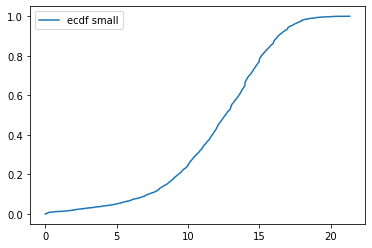

In [338]:
plt.plot(ecdfsmall.x, ecdfsmall.y, label="ecdf small")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [339]:
ajustar(small)

0.1886341597368827 beta
0.1569331161802371 burr
0.41305886908943046 burr12
0.5981754018353524 exponweib
0.3023732537768262 gumbel_l
0.3935937619953509 johnsonsb
0.4067508326905126 johnsonsu
0.4015522060248873 loggamma
0.15693718897836395 mielke
0.1994769922068106 pearson3
0.3202460145844348 powernorm
0.30536451257689456 skewnorm
0.4115241894170534 weibull_min


0.5981754018353524 exponweib


In [340]:
dists = st.exponweib # Ajusta muy bien con burr pvalor del 0.15
args = dists.fit(small)
print(args)

(0.7381562142764448, 11.479019150555368, -16.63642196750766, 31.092501847668174)


### Test de Kolomogorov-Smirnov

H_0 = Datos observados provienen de una distribución exponencial con un parámetro de tasa de máxima verosimilitud.
Si p_valor es bajo (menor a 0.05) entonces rechazo la nula.

In [341]:
st.kstest(small, dists.cdf, args)

KstestResult(statistic=0.01289639086079597, pvalue=0.5981754018353524)

In [342]:
[cs, ds, ls, ss] = args

### Ajuste gráfico de funciones de distribución CDF

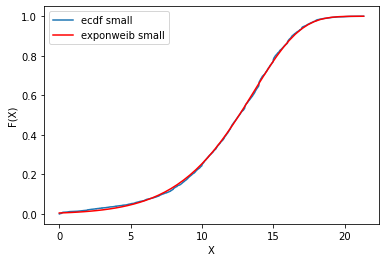

In [343]:
plt.plot(ecdfsmall.x, ecdfsmall.y, label="ecdf small")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(small), np.max(small))
plt.plot(x, dists.cdf(x, cs, ds, ls, ss), label = "exponweib small", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste de Razas Grandes

In [344]:
big = []

big = df[df['breed_vc'].isin(['Labrador Retriever','Boxer','German Shepherd Dog'])]
big = big['lifespan'].tolist()

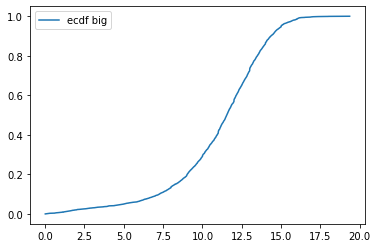

In [345]:
ecdfbig = ECDF(big)

plt.plot(ecdfbig.x, ecdfbig.y, label="ecdf big")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [346]:
ajustar(big)

0.17100474079963823 burr
0.23867356597460154 genlogistic
0.6313967096219582 johnsonsu
0.17134818067547863 mielke


0.6313967096219582 johnsonsu


In [347]:
distb = st.johnsonsu # Ajusta bien con burr pvalor de 0.17
args = distb.fit(big)
print(args)

st.kstest(big, distb.cdf, args)

(1.8336587890127198, 1.9926418592343387, 15.34979949251946, 3.5883637714672547)


KstestResult(statistic=0.011219752728179926, pvalue=0.6313967096219582)

### Ajuste gráfico de funciones de distribución CDF

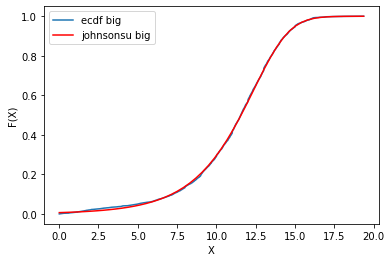

In [348]:
[cb, db, lb, sb] = args

plt.plot(ecdfbig.x, ecdfbig.y, label="ecdf big")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(big), np.max(big))
plt.plot(x, distb.cdf(x, cb, db, lb, sb), label = "johnsonsu big", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Ajuste Razas Medianas

In [349]:
medium = []

medium = df[df['breed_vc'].isin(['Staffordshire Bull Terrier','Cocker Spaniel','Border Collie','Springer Spaniel'])]
medium = medium['lifespan'].tolist()

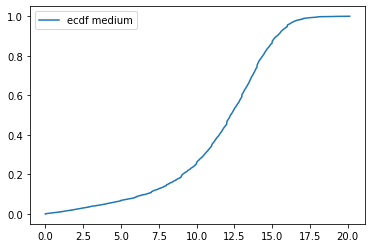

In [350]:
ecdfmedium = ECDF(medium)

plt.plot(ecdfmedium.x, ecdfmedium.y, label="ecdf medium")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [351]:
ajustar(medium)

0.15016225528776717 genlogistic
0.20968804800994345 johnsonsu


0.20968804800994345 johnsonsu


In [352]:
distm = st.johnsonsu  # Ajusta genlogistic con pvalor de 0.15
args = distm.fit(medium)
print(args)

st.kstest(medium, distm.cdf, args)

(2.0846703670464235, 1.8763745049721932, 16.80155839296035, 3.362958759998329)


KstestResult(statistic=0.014785486155644859, pvalue=0.20968804800994345)

### Ajuste gráfico de funciones de distribución CDF

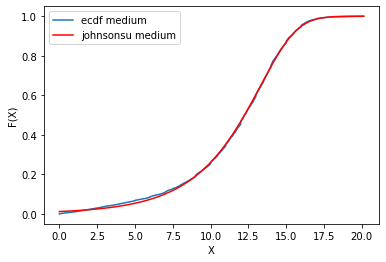

In [353]:
[cm, dm, lm, sm] = args

plt.plot(ecdfmedium.x, ecdfmedium.y, label="ecdf medium")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(medium), np.max(medium))
plt.plot(x, distm.cdf(x, cm, dm, lm, sm), label = "johnsonsu medium", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

## Razas Grandes vs Pequeñas vs Medianas

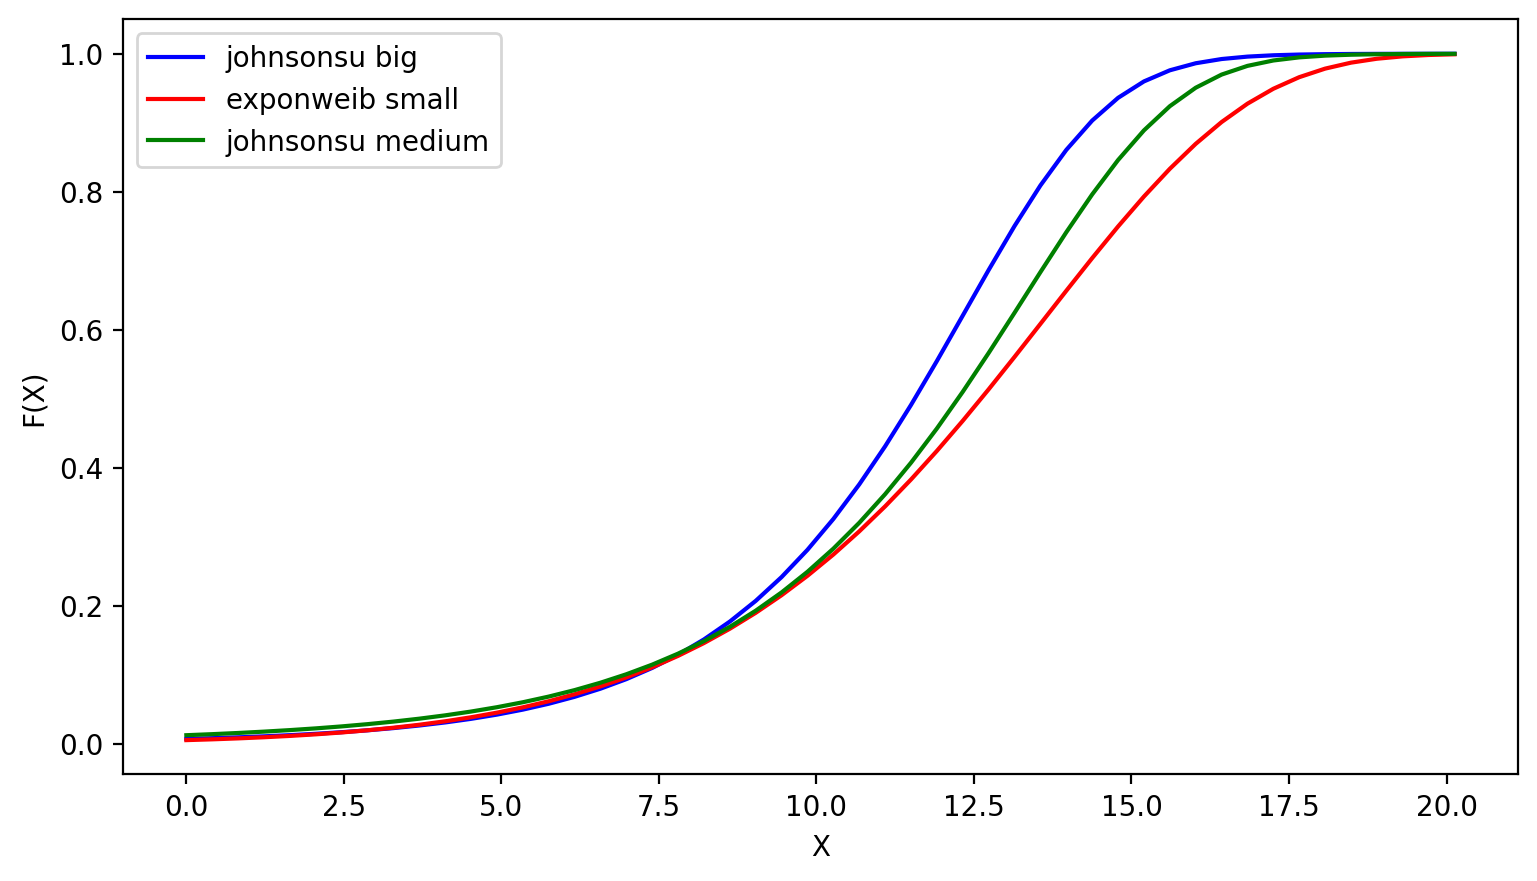

In [354]:
# Hay que crear un vector sobre el cuál escalar la CDF teórica
plt.figure(figsize=(9,5), dpi=200)

# plt.plot(ecdfbig.x, ecdfbig.y, label="ecdf big")
# plt.plot(ecdfsmall.x, ecdfsmall.y, label="ecdf small")
# plt.plot(ecdfmedium.x, ecdfmedium.y, label="ecdf medium")

#x = np.linspace(np.min(big), np.max(big))
#plt.figure(figsize=(9,5), dpi=200)
plt.plot(x, distb.cdf(x, cb, db, lb, sb), label = "johnsonsu big", color='blue')
plt.plot(x, dists.cdf(x, cs, ds, ls, ss), label = "exponweib small", color='red')
plt.plot(x, distm.cdf(x, cm, dm, lm, sm), label = "johnsonsu medium", color='green')

plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

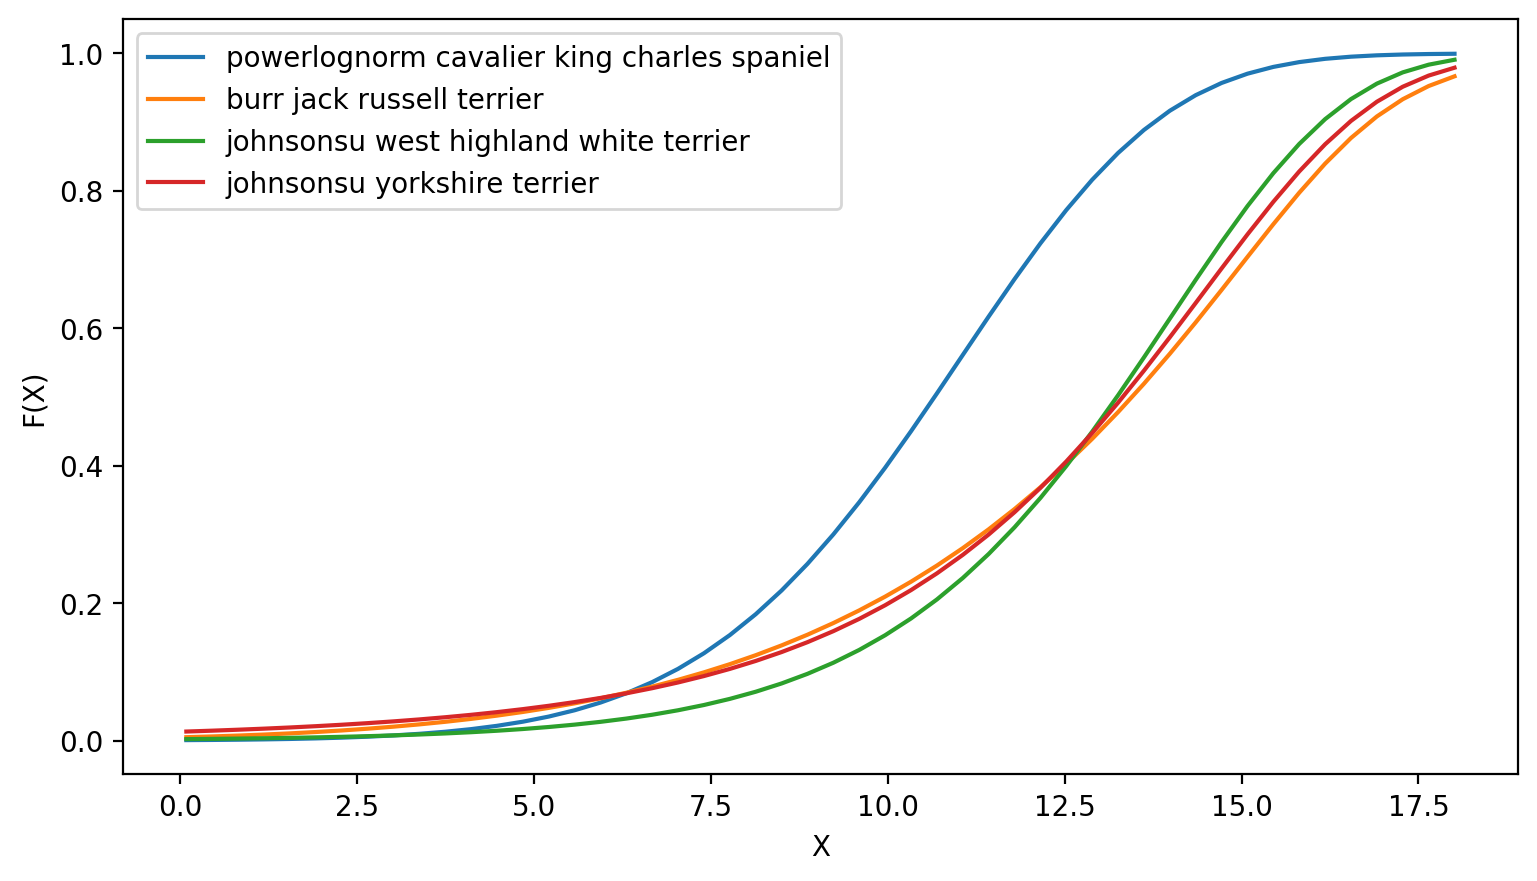

In [365]:
# Cual es la raza mas longeva? 
plt.figure(figsize=(9,5), dpi=200)
plt.plot(x, distcavalier.cdf(x, ccavalier, dcavalier, lcavalier, scavalier), label = "powerlognorm cavalier king charles spaniel") # IGUAL A COCKER
plt.plot(x, distjack.cdf(x, cjack, djack, ljack, sjack), label = "burr jack russell terrier")
plt.plot(x, distwest.cdf(x, cwest, dwest, lwest, swest), label = "johnsonsu west highland white terrier")
plt.plot(x, distyorkshire.cdf(x, cyorkshire, dyorkshire, lyorkshire, syorkshire), label = "johnsonsu yorkshire terrier")

plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

# Razas Puras vs Cruzados

In [212]:
pure = df.loc[df['pure_cross'] == 'Purebred']
pure = pure['lifespan'].tolist()

cross = df.loc[df['pure_cross'] == 'Crossbred']
#cross = df.loc[df['sex'] == 'Male']
#cross = df.loc[df['neuter'] == 'Entire']
cross = cross['lifespan'].tolist()

# cross = df[df['breed_vc'].isin(['Labrador Retriever','Boxer','German Shepherd Dog'])]

In [213]:
ecdfp = ECDF(pure)
ecdfc = ECDF(cross)

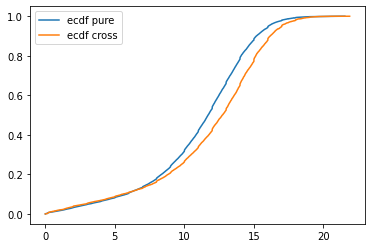

In [214]:
plt.plot(ecdfp.x, ecdfp.y, label="ecdf pure")
plt.plot(ecdfc.x, ecdfc.y, label="ecdf cross")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [216]:
ajustar(cross)

No ajusta a ninguna distribución de scipy.stats


In [215]:
ajustar(pure)

No ajusta a ninguna distribución de scipy.stats


In [156]:
distp = st.levy_stable #genlogistic medio ajusta
args = distp.fit(cross)
print(args)

st.kstest(cross, distp.cdf, args)

KeyboardInterrupt: 

### Ajuste gráfico de funciones de distribución CDF

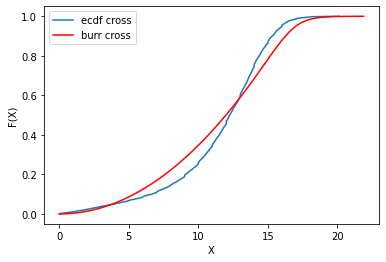

In [139]:
[c, d, l, s] = args

plt.plot(ecdf.x, ecdf.y, label="ecdf cross")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(cross), np.max(cross))
plt.plot(x, distp.cdf(x, c, d, l, s), label = "burr cross", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

# Asegurados vs No Asegurados

In [391]:
insuredbig = df[df['breed_vc'].isin(['Labrador Retriever','Boxer','German Shepherd Dog'])][df['insured'].isin(['Insured'])]['lifespan'].tolist()
uninsuredbig = df[df['breed_vc'].isin(['Labrador Retriever','Boxer','German Shepherd Dog'])][df['insured'].isin(['Uninsured'])]['lifespan'].tolist()

insuredmedium = df[df['breed_vc'].isin(['Staffordshire Bull Terrier','Cocker Spaniel','Border Collie','Springer Spaniel'])][df['insured'].isin(['Insured'])]['lifespan'].tolist()
uninsuredmedium = df[df['breed_vc'].isin(['Staffordshire Bull Terrier','Cocker Spaniel','Border Collie','Springer Spaniel'])][df['insured'].isin(['Uninsured'])]['lifespan'].tolist()

insuredsmall = df[df['breed_vc'].isin(['Jack Russell Terrier','West Highalnd White Terrier','Yorkshire Terrier','Cavalier King Charles Spaniel'])][df['insured'].isin(['Insured'])]['lifespan'].tolist()
uninsuredsmall = df[df['breed_vc'].isin(['Jack Russell Terrier','West Highalnd White Terrier','Yorkshire Terrier','Cavalier King Charles Spaniel'])][df['insured'].isin(['Uninsured'])]['lifespan'].tolist()

In [373]:
ajustar(insuredbig)
ajustar(uninsuredbig)
ajustar(insuredmedium)
ajustar(uninsuredmedium)
ajustar(insuredsmall)
ajustar(uninsuredsmall)

0.947074969838769 beta
0.25356041076617974 burr
0.9195203577865303 burr12
0.27079546563019596 genlogistic
0.07864472654087329 genextreme
0.8903416003129838 gengamma
0.8519890852738676 gompertz
0.9163733160104411 gumbel_l
0.9648895385705614 johnsonsb
0.9596896300102307 johnsonsu
0.915459728219185 loggamma
0.2535601290309154 mielke
0.9479271686966417 pearson3
0.14097059126776612 powerlognorm
0.505774925880068 powernorm
0.6046606826369882 skewnorm
0.9180008943285866 weibull_min
0.07859120489626426 weibull_max


0.9648895385705614 johnsonsb
0.27105388016309306 burr
0.32327055038257646 genlogistic
0.4017368889127835 johnsonsu
0.2710579862447814 mielke


0.4017368889127835 johnsonsu
0.551997915791815 beta
0.2217878442509661 burr
0.6560075791179489 burr12
0.8119209980756934 exponweib
0.3084905952027134 genlogistic
0.57436559969826 gompertz
0.7808837808479299 gumbel_l
0.6779606539827392 johnsonsb
0.710008412943494 johnsonsu
0.7173726761204833 loggamma
0.9245235799894106 mielke
0.50032111693747

In [379]:
distib = st.johnsonsb
args = distib.fit(insuredbig)
print(args)
[cib, dib, lib, sib] = args
st.kstest(insuredbig, distib.cdf, args)

(-7.365488529770884, 2.626193197938159, -114.5516194193458, 133.57482012121739)


KstestResult(statistic=0.016206777970323105, pvalue=0.9648895385705614)

In [385]:
distub = st.johnsonsu
args = distub.fit(uninsuredbig)
print(args)
[cub, dub, lub, sub] = args
st.kstest(uninsuredbig, distub.cdf, args)

(1.624839772449651, 1.8858613122261088, 15.018822148899442, 3.5144147881817602)


KstestResult(statistic=0.01509244759848899, pvalue=0.4017368889127835)

In [386]:
distim = st.mielke
args = distim.fit(insuredmedium)
print(args)
[cim, dim, lim, sim] = args
st.kstest(insuredmedium, distim.cdf, args)

(4.614862406988099, 29.00830507684968, -5.273485237546689, 20.00904785215101)


KstestResult(statistic=0.01871321130126702, pvalue=0.9245235799894106)

In [388]:
distum = st.genlogistic
args = distum.fit(uninsuredmedium)
print(args)
[cume, lume, sume] = args
st.kstest(uninsuredmedium, distum.cdf, args)

(0.24871245201012254, 14.781106524809287, 0.8631990146870394)


KstestResult(statistic=0.01430695774545132, pvalue=0.3401286629385849)

In [389]:
distis = st.johnsonsb
args = distis.fit(insuredsmall)
print(args)
[cis, dis, lis, sis] = args
st.kstest(insuredsmall, distis.cdf, args)

(-12.950671816254394, 4.446294049288528, -265.38988883063524, 292.4175341225993)


KstestResult(statistic=0.017974820407491987, pvalue=0.9934882514714214)

In [390]:
distus = st.johnsonsb
args = distus.fit(uninsuredsmall)
print(args)
[cus, dus, lus, sus] = args
st.kstest(uninsuredsmall, distus.cdf, args)

(-12.950671816254394, 4.446294049288528, -265.38988883063524, 292.4175341225993)


KstestResult(statistic=0.017974820407491987, pvalue=0.9934882514714214)

In [2]:
plt.figure(figsize=(9,5), dpi=200)
plt.plot(x, distib.cdf(x, cib, dib, lib, sib), label = "johnsonsb insured big") # IGUAL A COCKER
plt.plot(x, distub.cdf(x, cub, dub, lub, sub), label = "johnsonsu uninsured big")
plt.plot(x, distim.cdf(x, cim, dim, lim, sim), label = "mielke insured medium")
plt.plot(x, distum.cdf(x, cume, lume, sume), label = "genlogistic uninsured medium")
plt.plot(x, distis.cdf(x, cis, dis, lis, sis), label = "johnsonsb insured medium")
plt.plot(x, distus.cdf(x, cus, dus, lus, sus), label = "johnsonsb uninsured medium")

plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

NameError: name 'plt' is not defined

In [371]:
ajustar(insuredbig)

0.27105388016309306 burr
0.32327055038257646 genlogistic
0.4017368889127835 johnsonsu
0.2710579862447814 mielke


0.4017368889127835 johnsonsu


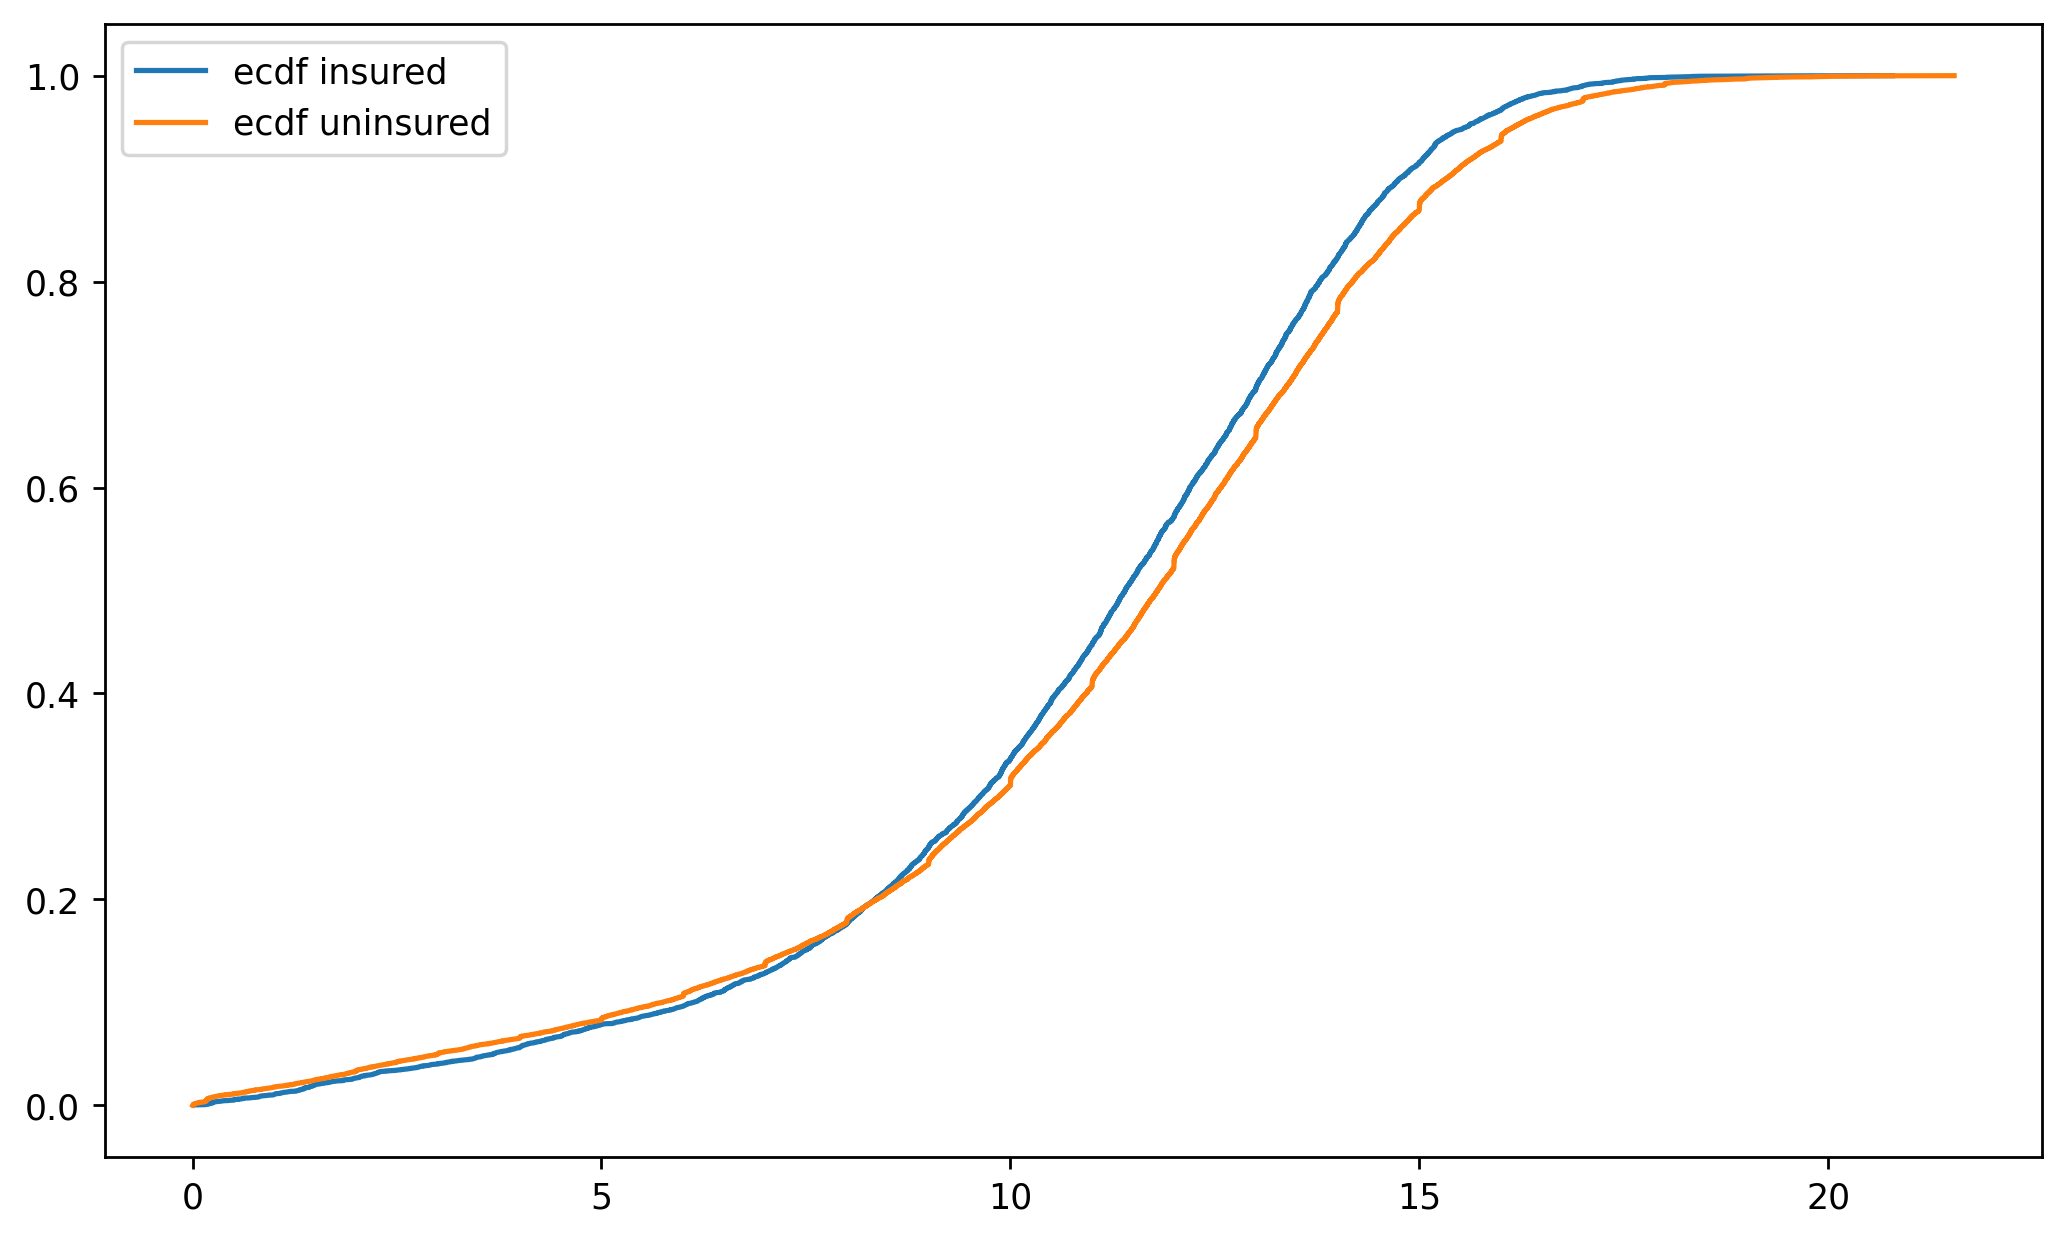

In [246]:
big = df[df['breed_vc'].isin(['Labrador Retriever','Boxer','German Shepherd Dog'])]
medium = df[df['breed_vc'].isin(['Staffordshire Bull Terrier','Cocker Spaniel','Border Collie','Springer Spaniel'])]
small = df[df['breed_vc'].isin(['Jack Russell Terrier','West Highalnd White Terrier','Yorkshire Terrier','Cavalier King Charles Spaniel'])]

#cross = df.loc[df['pure_cross'] == 'Crossbred']

insured = df[df['insured'].isin(['Insured'])]['lifespan'].tolist()
#uninsured = df[df['insured'].isin(['Uninsured'])]['lifespan'].tolist()
uninsured = df[df['pure_cross'].isin(['Purebred'])][df['insured'].isin(['Uninsured'])]['lifespan'].tolist()

ecdfi = ECDF(insured)
ecdfu = ECDF(uninsured)

plt.figure(figsize=(10,6), dpi=250)
plt.plot(ecdfi.x, ecdfi.y, label="ecdf insured")
plt.plot(ecdfu.x, ecdfu.y, label="ecdf uninsured")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [224]:
ajustar(insured)

0.0911691965057474 burr12
0.055383716481483214 exponweib
0.39654463947487917 gumbel_l
0.05591752954408946 johnsonsb
0.15270213150710754 johnsonsu
0.13018188368432304 loggamma


0.39654463947487917 gumbel_l


In [247]:
ajustar(uninsured)

No ajusta a ninguna distribución de scipy.stats


In [452]:
# dist_names = ['beta', 'norm','gumbel_l','fisk', 'weibull_min', 'burr', 'burr12', 'logistic', 'lognorm', 'gamma', 'loggamma', 'expon', 'fatiguelife', 'genlogistic']

dist_names = ['alpha','anglit','arcsine','argus','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','crystalball','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','gennorm','genpareto','genexpon','genextreme','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kappa4','kappa3','ksone','laplace','laplace_asymmetric','levy','levy_l','logistic','loggamma','loglaplace','lognorm','loguniform','lomax','maxwell','mielke','moyal','nakagami','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','rayleigh','rice','recipinvgauss','semicircular','skewcauchy','skewnorm','t','trapezoid','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max','wrapcauchy']
figprops = dict(figsize=(8., 7. / 1.618), dpi=128)                       
adjustprops = dict(left=0.1, bottom=0.1, right=0.97, top=0.93, wspace=0.2, hspace=0.2)

dist_accepted = []
num_rejects = 0
num_acceptances = 0

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(medium)
    #x = np.linspace(xmin, xmax, 100) # 
    #fig = pylab.figure(**figprops)                                            
    #fig.subplots_adjust(**adjustprops)
    #ax = fig.add_subplot(1, 1, 1) 
    #ax.plot(x,dist(*param).pdf(x),linewidth=4,label=dist_name)

    ks = scipy.stats.kstest(medium, dist_name, args=param)
    
    D, pval = ks
    if pval < alpha:
        num_rejects += 1
    else
        num_acceptances += 1
        dist_accepted.append(ks)
        
    print((dist_name, ks))
    


('alpha', KstestResult(statistic=0.1180850145867286, pvalue=8.056249410278696e-63))
('anglit', KstestResult(statistic=0.2415544673153192, pvalue=4.108775105149077e-264))
('arcsine', KstestResult(statistic=0.3362637305334292, pvalue=0.0))
('argus', KstestResult(statistic=0.17345085551966188, pvalue=1.6251950039000016e-135))
('beta', KstestResult(statistic=0.04753859321262027, pvalue=1.6101175639591726e-10))
('betaprime', KstestResult(statistic=0.10274142600909464, pvalue=1.25753724013569e-47))
('bradford', KstestResult(statistic=0.3267884629312757, pvalue=0.0))
('burr', KstestResult(statistic=0.02011182608725176, pvalue=0.03102667444320717))
('burr12', KstestResult(statistic=0.027274539113404217, pvalue=0.0009463914025167739))
('cauchy', KstestResult(statistic=0.11182747348486488, pvalue=2.2915480119628856e-56))
('chi', KstestResult(statistic=0.10501290481734132, pvalue=9.655525915789244e-50))
('chi2', KstestResult(statistic=0.1397480585388161, pvalue=6.464516541866392e-88))
('cosine', 

In [404]:
disti = st.loggamma
args = disti.fit(insured)
print(args)

st.kstest(insured, disti.cdf, args)
[ci, li, si] = args

(0.8563395382280183, 13.452587697330326, 2.6823765701339144)


In [384]:
distu = st.gumbel_l
args = distu.fit(uninsured)
print(args)

st.kstest(uninsured, distu.cdf, args)
[cu, su] = args

(13.94654734743537, 3.0843807879887066)


KstestResult(statistic=0.014841293399525779, pvalue=0.5247634889372088)

### Ajuste gráfico de funciones de distribución CDF

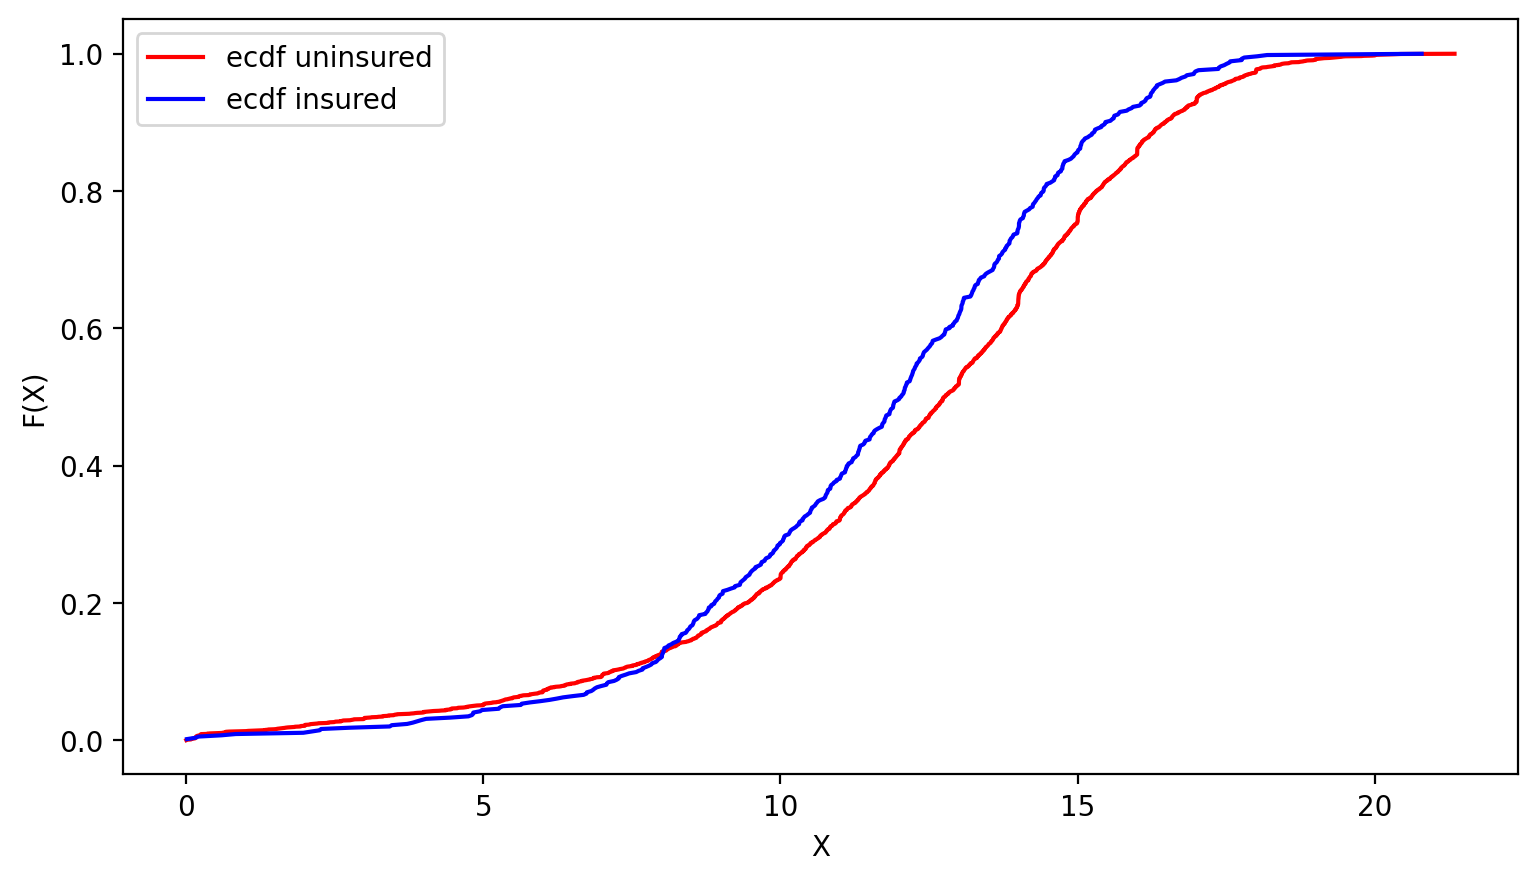

In [400]:

plt.figure(figsize=(9,5), dpi=200)
plt.plot(ecdfu.x, ecdfu.y, label="ecdf uninsured", color='red')
plt.plot(ecdfi.x, ecdfi.y, label="ecdf insured", color='blue')
# Hay que crear un vector sobre el cuál escalar la CDF teórica

x = np.linspace(np.min(uninsured), np.max(uninsured))
#plt.plot(x, disti.cdf(x, ci, di, li, si), label = "johnsonsb insured-small", color='blue')
#plt.plot(x, distu.cdf(x, cu, su), label = "gumbel_l uninsured-small", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

# Castración o Entero

In [369]:
neutered = df.loc[df['neuter'] == 'Neutered']
neutered = neutered['lifespan'].tolist()

entire = df.loc[df['neuter'] == 'Entire']
entire = entire['lifespan'].tolist()

In [9]:
ecdfn = ECDF(neutered)
ecdfe = ECDF(entire)

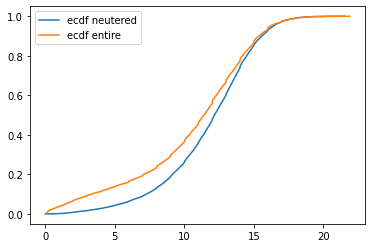

In [10]:
plt.plot(ecdfn.x, ecdfn.y, label="ecdf neutered")
plt.plot(ecdfe.x, ecdfe.y, label="ecdf entire")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [57]:
distn = st.burr # para neutered burr ajusta con pvalor de 0.07
args = distn.fit(neutered)
print(args)
st.kstest(neutered, distn.cdf, args)

(19.322144493952408, 0.2065207594071456, -3.1035792609345663, 18.21019056159237)


KstestResult(statistic=0.009647386610445785, pvalue=0.0758156751211102)

In [62]:
diste = st.burr12
args = diste.fit(entire)
print(args)
st.kstest(entire, diste.cdf, args)

(32.29913314278994, 11315.090171119904, -101.68204958893712, 152.44223445898382)


KstestResult(statistic=0.03695502161234822, pvalue=6.998695958383508e-16)

In [34]:
stat,pvalue=st.kstest(entire, diste.cdf, args)

In [43]:
distributions = ['loggamma','burr','logistic','fisk','fatiguelife']
pvalues = []

for i in distributions:
    distn = st.i
    args = distn.fit(neutered)
    stat,pvalue=st.kstest(neutered, distn.cdf, args)
    pvalues.append(pvalue)

AttributeError: module 'scipy.stats' has no attribute 'i'

In [52]:
# import library
from distfit import distfit

In [58]:
# Initialize with default settings
model= distfit(bound='both')

# Fit to find the best theoretical distribution 
model.fit_transform(np.array(entire))

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0223274] [loc=10.543 scale=4.356]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.102214] [loc=0.003 scale=10.540]
[distfit] >[pareto    ] [0.39 sec] [RSS: 0.103541] [loc=-431715769.236 scale=431715769.238]
[distfit] >[dweibull  ] [0.09 sec] [RSS: 0.0217279] [loc=10.730 scale=3.683]
[distfit] >[t         ] [0.15 sec] [RSS: 0.0223279] [loc=10.543 scale=4.356]
[distfit] >[genextreme] [0.49 sec] [RSS: 0.0190621] [loc=9.123 scale=4.596]
[distfit] >[gamma     ] [0.15 sec] [RSS: 0.0256178] [loc=-66.224 scale=0.262]
[distfit] >[lognorm   ] [0.35 sec] [RSS: 0.0226782] [loc=-680.240 scale=690.778]
[distfit] >[beta      ] [0.34 sec] [RSS: 0.00977065] [loc=-4179.503 scale=4201.556]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.0662182] [loc=0.003 scale=21.881]
[distfit] >[loggamma  ] [0.02 sec] [RSS: 0.00750754] [loc=12.331 scale=3.612]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.loggamma_gen at 0x25ab0aa75e0>,
  'stats': 'RSS',
  'params': (1.0517395759177894, 12.331423589858215, 3.611630418659638),
  'name': 'loggamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x25ab1e42710>,
  'score': 0.007507536299260663,
  'loc': 12.331423589858215,
  'scale': 3.611630418659638,
  'arg': (1.0517395759177894,),
  'CII_min_alpha': 2.2290747317706856,
  'CII_max_alpha': 16.41201660756277},
 'summary':          distr     score  LLE               loc             scale  \
 0     loggamma  0.007508  NaN         12.331424           3.61163   
 1         beta  0.009771  NaN      -4179.503377       4201.555522   
 2   genextreme  0.019062  NaN          9.123093          4.596444   
 3     dweibull  0.021728  NaN         10.729802          3.683352   
 4         norm  0.022327  NaN         10.543015          4.356132   
 5            t  0.022328  NaN         10.542972          4.356239   
 6      lognorm  0.022678

In [54]:
np.array(neutered)

array([ 9.92185718, 10.03410906, 10.58453114, ..., 13.80971937,
       13.1525211 ,  6.08774796])

### Test de Kolomogorov-Smirnov

H_0 = Datos observados provienen de una distribución exponencial con un parámetro de tasa de máxima verosimilitud.
Si p_valor es bajo (menor a 0.05) entonces rechazo la nula.

In [251]:
st.kstest(uninsured, distu.cdf, args)

KstestResult(statistic=0.07970928834533403, pvalue=1.1097417119063788e-140)

In [1]:
[cb, db, lb, sb] = args

NameError: name 'args' is not defined

### Ajuste gráfico de funciones de distribución CDF

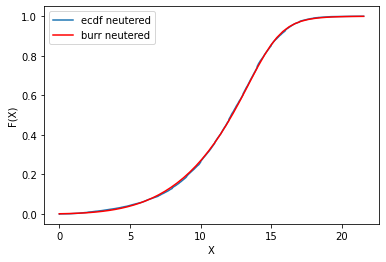

In [216]:
plt.plot(ecdfn.x, ecdfn.y, label="ecdf neutered")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(neutered), np.max(neutered))
plt.plot(x, distn.cdf(x, cb, db, lb, sb), label = "burr neutered", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

# Agrupación por Sexo

In [371]:
male = df.loc[df['sex'] == 'Male']
male = male['lifespan'].tolist()

female = df.loc[df['sex'] == 'Female']
female = female['lifespan'].tolist()

In [64]:
ecdfm = ECDF(male)
ecdff = ECDF(female)

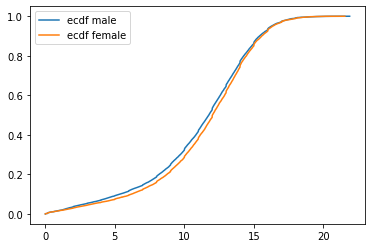

In [65]:
plt.plot(ecdfm.x, ecdfm.y, label="ecdf male")
plt.plot(ecdff.x, ecdff.y, label="ecdf female")
plt.legend()

### Método numérico de máxima verosimilitud para estimar los parámetros de la distribución

In [67]:
# Initialize with default settings
model= distfit(bound='both')

# Fit to find the best theoretical distribution 
model.fit_transform(np.array(male))

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0148523] [loc=11.069 scale=3.900]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.123911] [loc=0.003 scale=11.067]
[distfit] >[pareto    ] [0.20 sec] [RSS: 0.207179] [loc=-3.126 scale=3.129]
[distfit] >[dweibull  ] [0.14 sec] [RSS: 0.0100581] [loc=11.473 scale=3.195]
[distfit] >[t         ] [0.12 sec] [RSS: 0.0112502] [loc=11.319 scale=3.510]
[distfit] >[genextreme] [0.52 sec] [RSS: 0.0140218] [loc=9.758 scale=4.139]
[distfit] >[gamma     ] [0.18 sec] [RSS: 0.0185179] [loc=-53.028 scale=0.256]
[distfit] >[lognorm   ] [0.40 sec] [RSS: 0.0155262] [loc=-358.785 scale=369.836]
[distfit] >[beta      ] [0.41 sec] [RSS: 0.00459914] [loc=-969.493 scale=991.732]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.0808559] [loc=0.003 scale=21.881]
[distfit] >[loggamma  ] [0.03 sec] [RSS: 0.00298754] [loc=11.507 scale=3.791]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.loggamma_gen at 0x25ab0aa75e0>,
  'stats': 'RSS',
  'params': (1.348646150167594, 11.506865854273574, 3.7914658685826117),
  'name': 'loggamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x25ab208ef20>,
  'score': 0.002987543869769015,
  'loc': 11.506865854273574,
  'scale': 3.7914658685826117,
  'arg': (1.348646150167594,),
  'CII_min_alpha': 3.812627579877259,
  'CII_max_alpha': 16.40693091689664},
 'summary':          distr     score  LLE         loc       scale  \
 0     loggamma  0.002988  NaN   11.506866    3.791466   
 1         beta  0.004599  NaN -969.493032  991.731748   
 2     dweibull  0.010058  NaN   11.473386    3.195291   
 3            t   0.01125  NaN   11.318612    3.510049   
 4   genextreme  0.014022  NaN    9.758297    4.138837   
 5         norm  0.014852  NaN   11.069382    3.899638   
 6      lognorm  0.015526  NaN -358.784925  369.836454   
 7        gamma  0.018518  NaN    -53.0284    0.2559

In [78]:
distm = st.genlogistic #
args = distm.fit(male)
print(args)
st.kstest(male, distm.cdf, args)

(0.32585460163821034, 14.210916351235038, 1.1904748863277486)


KstestResult(statistic=0.02046437085489632, pvalue=3.0097916536000048e-06)

In [256]:
distu = st.ncx2 
args = distu.fit(uninsured)
print(args)
st.kstest(uninsured, distu.cdf, args)

(0.020270753307387174, 18.79336681681368, 0.0026237736710015996, 0.5948306573700947)


In [57]:
[cb, lb, sb] = args

### Ajuste gráfico de funciones de distribución CDF

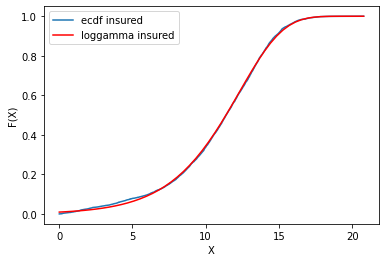

In [58]:
plt.plot(ecdf.x, ecdf.y, label="ecdf insured")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(insured), np.max(insured))
plt.plot(x, distp.cdf(x, cb, lb, sb), label = "loggamma insured", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

# Hazard Function

           NA_estimate
timeline              
0.000000      0.000000
0.027264      0.001203
0.035478      0.002408
0.040840      0.003614
0.175222      0.004822
...                ...
15.460529     5.217114
16.002624     5.467114
16.845882     5.800447
16.865047     6.300447
18.001255     7.300447

[756 rows x 1 columns]


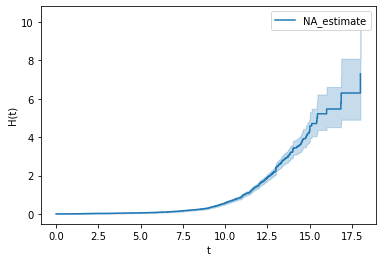

In [44]:
# Using Nelson Aalen Estimator with lifeline Library
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
#naf_f = NelsonAalenFitter()

naf.fit(boxer)
#naf_f.fit(labrador)

print (naf.cumulative_hazard_)
#print (naf_f.cumulative_hazard_)

naf.plot_cumulative_hazard()
#plt.plot(x,naf.timeline)
plt.xlabel('t')
plt.ylabel('H(t)')
plt.legend()
#naf_f.plot_cumulative_hazard()

# Utilidades

Otra forma de graficar CDF

<AxesSubplot:ylabel='Density'>

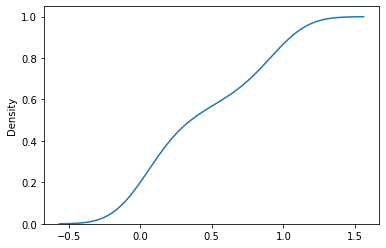

In [232]:
import seaborn as sns
sns.kdeplot(data = boxer, cumulative = True, label = "ECDF")
#sns.kdeplot(data = dist.cdf(boxer,c,loc,scale), cumulative = True, label = "TCDF")
[c, l, s] = st.fisk.fit(boxer)
x = np.linspace(np.min(boxer), np.max(boxer))
#sns.kdeplot(data = st.fisk.cdf(x, c, l, s), cumulative = True, label = "TCDF")

Otra forma de armar la ECDF

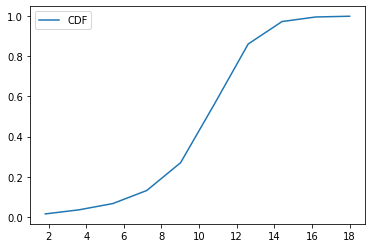

In [168]:
count, bins_count = np.histogram(boxer, bins=10)
pdf = count / sum(count)
bcdf = np.cumsum(pdf)
plt.plot(bins_count[1:], bcdf, label="CDF")
plt.legend()
plt.show()

Para sacar histogramas y ECDF

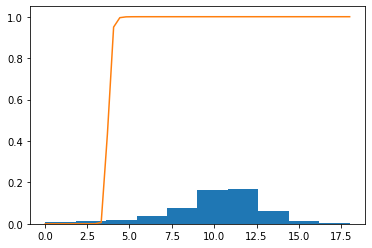

In [205]:
plt.hist(boxer, bins = 10, density=True)
[mean_fit, std_fit] = st.norm.fit(boxer)
x = np.linspace(np.min(boxer), np.max(boxer))
plt.plot(x, st.fisk.cdf(x, mean_fit, std_fit),)

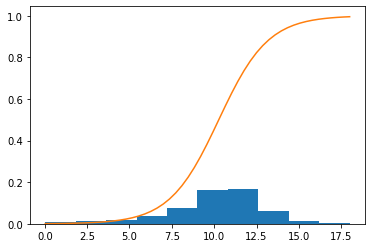

In [207]:
plt.hist(boxer, bins = 10, density=True)
[c, l, s] = st.fisk.fit(boxer)
x = np.linspace(np.min(boxer), np.max(boxer))
plt.plot(x, st.fisk.cdf(x, c, l, s),)

# Pruebas

In [178]:
df.isnull().values.any()
df.isnull().sum().sum()
df['breed_vc'].isnull().sum()

89

In [51]:
from scipy import stats, optimize

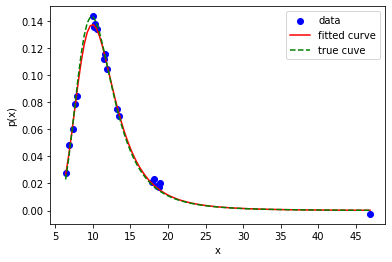

In [64]:
c = 3.09
loc = 5 
scale = 6
X = st.fisk.rvs(c,loc,scale,size = 20)
p = st.fisk.pdf(X,c,loc,scale) + np.random.randn(len(X))*0.005

# wrapper for the fisk distribution
def fisk(x, c, loc, scale):
    return stats.fisk.pdf(x,c,loc,scale)

# curve fitting
popt, _ = optimize.curve_fit(fisk, X, p)
popt

plt.scatter(X,p,label='data',c='b')
x = np.linspace(X.min(),X.max(),100)
plt.plot(x,fisk(x,*popt),label='fitted curve',c='r')
plt.plot(x,fisk(x,c,loc,scale),'--',c='g',label='true cuve')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

In [68]:
np.mean(np.std(X))

8.629060612928848

## Ajuste de Distribución Pug

Como alternativa se definen funciones para la ecdf

In [6]:
pug = df.loc[df['breed_vc'] == 'Pug']
pug = pug['lifespan'].tolist()

In [7]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_ecdf(a):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    plt.grid(True)
    plt.savefig('ecdf.png')

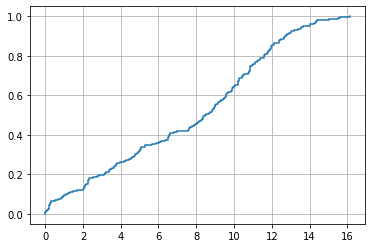

In [9]:
plot_ecdf(pug)

In [41]:
ecdf = ECDF(pug)

In [36]:
# Método numérico de máxima verosimilitud para estimar los parámetros de la distribución
dist = st.fisk
args = dist.fit(pug)
args


(153804797.96748945, -396991710.802438, 396991718.60738814)

In [38]:
[c, l, s] = args

### Test de Kolomogorov-Smirnov

In [37]:
st.kstest(pug, dist.cdf, args)

KstestResult(statistic=0.08443548535791967, pvalue=0.1153957378559427)

### Ajuste gráfico de funciones de distribución CDF

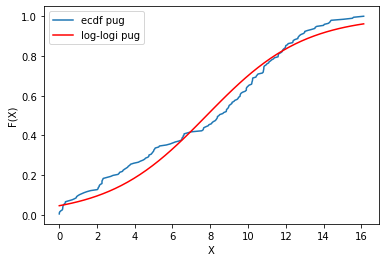

In [42]:
plt.plot(ecdf.x, ecdf.y, label="ecdf pug")
# Hay que crear un vector sobre el cuál escalar la CDF teórica
x = np.linspace(np.min(pug), np.max(pug))
plt.plot(x, dist.cdf(x, c, l, s), label = "log-logi pug", color='red')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.legend()

In [16]:
boxer = df.loc[df['breed_vc'] == 'Boxer']

# Versión 1

(array([192., 103.,  79.,  98.,  77.,  92., 128., 106.,  97., 146., 106.,
         95.,  96., 121.,  86., 123.,  98.,  88., 141., 105., 142., 118.,
        162., 137., 133., 130., 138., 241., 179., 174., 188., 226., 260.,
        220., 253., 278., 432., 334., 339., 370., 386., 579., 443., 447.,
        464., 733., 563., 596., 556., 621., 835., 652., 724., 734., 974.,
        782., 764., 771., 714., 980., 765., 782., 789., 980., 790., 606.,
        660., 565., 793., 492., 437., 406., 341., 523., 280., 251., 160.,
        267., 115., 106.,  93.,  73., 115.,  36.,  44.,  28.,  35.,  22.,
         15.,   8.,   9.,  13.,   5.,   4.,   2.,   0.,   1.,   1.,   1.,
          1.]),
 array([2.62377367e-03, 2.21432809e-01, 4.40241843e-01, 6.59050878e-01,
        8.77859913e-01, 1.09666895e+00, 1.31547798e+00, 1.53428702e+00,
        1.75309605e+00, 1.97190509e+00, 2.19071412e+00, 2.40952316e+00,
        2.62833219e+00, 2.84714123e+00, 3.06595026e+00, 3.28475930e+00,
        3.50356833e+00, 3.7223

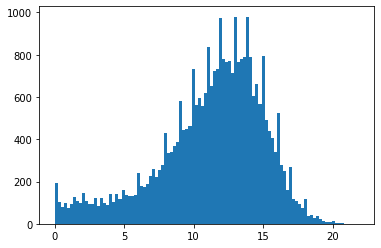

In [46]:
plt.hist(df.iloc[:, 0].tolist(), bins = 100)

In [45]:
st.expon.fit(df.iloc[:, 0].tolist())

(0.0026237736710016, 11.22734033689924)

https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

In [246]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

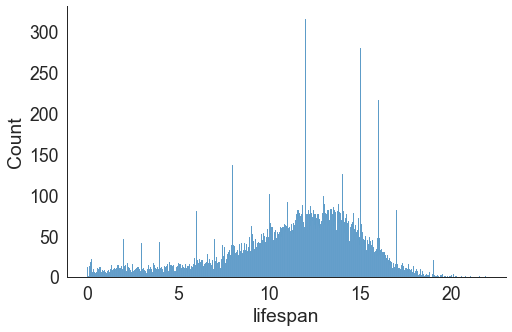

In [58]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="lifespan", kind="hist", bins = 1000, aspect = 1.5)

In [59]:
lifespan = df["lifespan"].values

,sumsquare_error,aic,bic,kl_div
loggamma,0.059275,808.044841,-7914.388599,inf
dweibull,0.062277,752.735177,-7873.334906,inf
t,0.065635,761.253453,-7829.691562,inf
fisk,0.065753,763.862366,-7828.188750,inf
lognorm,0.093893,770.200219,-7532.149181,inf


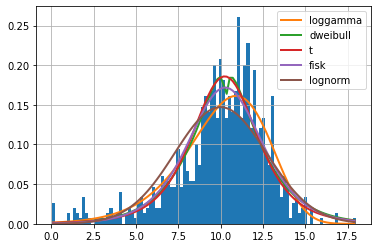

In [247]:
f = Fitter(boxer2,
           distributions=['loggamma',
                          'lognorm',
                          "beta",
                          "dweibull",
                          "fisk",
                         't'])
f.fit()
f.summary()

In [137]:
f.get_best(method = 'sumsquare_error')

{'loggamma': {'c': 2.120164502203929,
  'loc': 8.318112288989127,
  'scale': 3.4624842400730556}}

,sumsquare_error,aic,bic,kl_div
cauchy,0.088754,743.316878,-7585.649305,inf
norm,0.092482,765.665957,-7551.457310,inf
lognorm,0.093893,770.200219,-7532.149181,inf
gamma,0.108101,763.149181,-7415.053574,inf
chi2,0.116161,761.262365,-7355.295602,inf


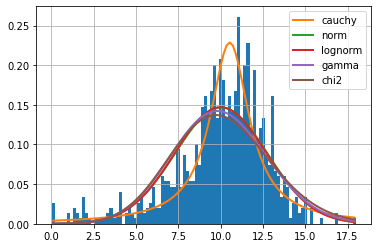

In [252]:
f = Fitter(boxer,
           distributions= get_common_distributions())
f.fit()
f.summary()

https://www.kdnuggets.com/2021/09/determine-best-fitting-data-distribution-python.html

In [128]:
from distfit import distfit

In [132]:
# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
boxer2 = df.loc[df['breed_vc'] == 'Boxer']
boxer2 = boxer2["lifespan"].values
dist.fit_transform(boxer2)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0297679] [loc=10.041 scale=2.722]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.26678] [loc=0.027 scale=10.013]
[distfit] >[pareto    ] [0.08 sec] [RSS: 0.256904] [loc=-380574.285 scale=380574.312]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.0152196] [loc=10.301 scale=2.113]
[distfit] >[t         ] [0.05 sec] [RSS: 0.0169425] [loc=10.249 scale=2.022]
[distfit] >[genextreme] [0.18 sec] [RSS: 0.898494] [loc=16.907 scale=2.545]
[distfit] >[gamma     ] [0.05 sec] [RSS: 0.0374509] [loc=-36.154 scale=0.171]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 0.0304705] [loc=-736.374 scale=746.386]
[distfit] >[beta      ] [0.10 sec] [RSS: 0.344594] [loc=-4.978 scale=5.019]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.189826] [loc=0.027 scale=17.974]
[distfit] >[loggamma  ] [0.01 sec] [RSS: 0.0136245] [loc=8.318 scale=3.462]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.loggamma_gen at 0x249899b2bc0>,
  'stats': 'RSS',
  'params': (2.120164502203929, 8.318112288989127, 3.4624842400730556),
  'name': 'loggamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x2499828ee90>,
  'score': 0.01362450539353908,
  'loc': 8.318112288989127,
  'scale': 3.4624842400730556,
  'arg': (2.120164502203929,),
  'CII_min_alpha': 5.185199310640272,
  'CII_max_alpha': 13.847200647281099},
 'summary':          distr     score  LLE            loc          scale  \
 0     loggamma  0.013625  NaN       8.318112       3.462484   
 1     dweibull   0.01522  NaN      10.300581       2.112969   
 2            t  0.016942  NaN      10.248865       2.021744   
 3         norm  0.029768  NaN      10.040706       2.721676   
 4      lognorm  0.030471  NaN    -736.373894     746.385658   
 5        gamma  0.037451  NaN     -36.154342       0.170896   
 6      uniform  0.189826  NaN       0.027264       17.97399   
 7    

In [70]:
# Print summary of evaluated distributions
print(dist.summary)

         distr     score  LLE             loc           scale  \
0     loggamma  0.002641  NaN        11.85624        3.626775   
1         beta  0.004445  NaN -4124013.659711  4124035.682838   
2     dweibull  0.010344  NaN       11.634207          3.1161   
3   genextreme  0.014563  NaN        9.936228        4.087019   
4            t  0.014679  NaN       11.279874         3.84701   
5         norm  0.015097  NaN       11.229964        3.839137   
6      lognorm  0.015833  NaN     -610.102486      621.294114   
7        gamma  0.018365  NaN      -55.672258        0.237974   
8      uniform  0.085289  NaN        0.002624       21.880903   
9        expon  0.129733  NaN        0.002624        11.22734   
10      pareto  0.211978  NaN        -3.13752        3.140144   

                                       arg  
0                    (1.2969289666925254,)  
1   (3069967.7583281286, 8.04179510833931)  
2                    (1.1726771162044698,)  
3                    (0.341940216649161

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nloggamma\nRSS(c=2.12016, loc=8.31811, scale=3.46248)'}, xlabel='Values', ylabel='Frequency'>)

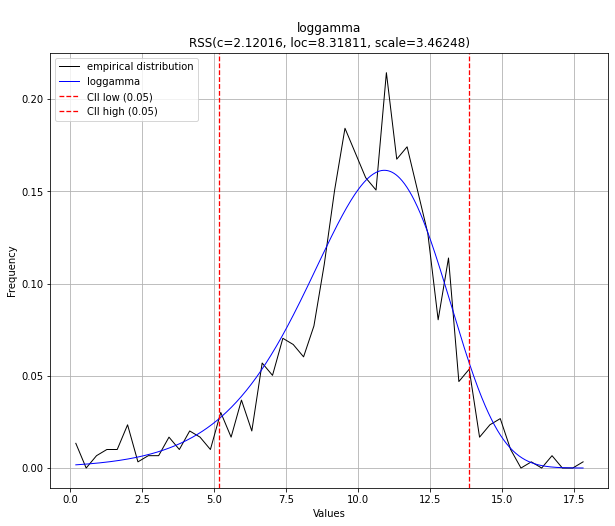

In [133]:
# Plot results
dist.plot()